In [ ]:
 !pip install torch

In [ ]:
 !pip install torch-optimizer


In [ ]:
 !pip install tensorflow

In [1]:
import pandas as pd

# === u.data : évaluations ===
data = pd.read_csv(
    "ml-100k/u.data",
    sep="\t",
    names=["userId", "movieId", "rating", "timestamp"]
)
print(" u.data (Évaluations):")
print(data.head(), "\n")

# === u.item : films ===
item_cols = [
    "movieId", "title", "release_date", "video_release_date", "IMDb_URL",
    "unknown", "Action", "Adventure", "Animation", "Children", "Comedy", "Crime",
    "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical",
    "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
item = pd.read_csv(
    "ml-100k/u.item",
    sep="|",
    names=item_cols,
    encoding="latin-1"
)
print(" u.item (Films):")
print(item[["movieId", "title", "release_date", "Comedy", "Drama"]].head(), "\n")

# === u.user : utilisateurs ===
user_cols = ["userId", "age", "gender", "occupation", "zip_code"]
user = pd.read_csv(
    "ml-100k/u.user",
    sep="|",
    names=user_cols
)
print(" u.user (Utilisateurs):")
print(user.head(), "\n")

# === u.genre : genres de films ===
print(" u.genre (Genres):")
with open("ml-100k/u.genre", "r", encoding="latin-1") as f:
    genre_lines = f.readlines()
    for line in genre_lines:
        print(line.strip())
print()

# === u.occupation : professions ===
print(" u.occupation (Occupations):")
with open("ml-100k/u.occupation", "r", encoding="latin-1") as f:
    occupation_lines = f.readlines()
    for line in occupation_lines:
        print("-", line.strip())


📄 u.data (Évaluations):
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596 

📄 u.item (Films):
   movieId              title release_date  Comedy  Drama
0        1   Toy Story (1995)  01-Jan-1995       1      0
1        2   GoldenEye (1995)  01-Jan-1995       0      0
2        3  Four Rooms (1995)  01-Jan-1995       0      0
3        4  Get Shorty (1995)  01-Jan-1995       1      1
4        5     Copycat (1995)  01-Jan-1995       0      1 

📄 u.user (Utilisateurs):
   userId  age gender  occupation zip_code
0       1   24      M  technician    85711
1       2   53      F       other    94043
2       3   23      M      writer    32067
3       4   24      M  technician    43537
4       5   33      F       other    15213 

📄 u.genre (Genres):
unknown|0
Action|1
Adventure|2
Animation|3
Children's|4
Comedy|5
Crime|6


In [2]:
data.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
data.describe()

,userId,movieId,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [4]:
data.tail()

,userId,movieId,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [5]:
 print(data.dtypes)

userId       int64
movieId      int64
rating       int64
timestamp    int64
dtype: object


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [7]:
print(data.isnull().sum().sum())

0


In [8]:
item.head()

,movieId,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
item.columns

Index(['movieId', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [10]:
 print(item.dtypes)

movieId                 int64
title                  object
release_date           object
video_release_date    float64
IMDb_URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object


In [11]:
 print(item.info())
# 1 valeur manquante dans release_date
# 1682 valeurs manquantes dans video_release_date
# 3 valeurs manquantes dans IMDb_URL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [12]:
print(item.isnull().sum().sum())

1686


In [13]:
item['video_release_date'].dropna()
# colonne vide

Series([], Name: video_release_date, dtype: float64)

In [14]:
user.head()

,userId,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [16]:
import pandas as pd

# Créer une liste (séparée) à partir du fichier lu ligne par ligne
genre = pd.read_csv("ml-100k/u.genre", sep="|", header=None, names=["genre", "genre_id"], encoding="latin-1")

# Afficher les 5 premiers genres
print(genre.head())



        genre  genre_id
0     unknown         0
1      Action         1
2   Adventure         2
3   Animation         3
4  Children's         4


In [17]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genre     19 non-null     object
 1   genre_id  19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 436.0+ bytes


In [18]:
genre.describe()

,genre_id
count,19.000000
mean,9.000000
std,5.627314
min,0.000000
25%,4.500000
50%,9.000000
75%,13.500000
max,18.000000


In [19]:
import pandas as pd

# Créer un DataFrame à partir de la liste des professions
occupations = pd.DataFrame(occupation_lines, columns=["occupation"])
occupations["occupation"] = occupations["occupation"].str.strip()  # enlever les retours à la ligne

print(occupations.head())


      occupation
0  administrator
1         artist
2         doctor
3       educator
4       engineer


In [20]:
occupations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   occupation  21 non-null     object
dtypes: object(1)
memory usage: 300.0+ bytes


In [21]:
occupations.head()

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer


In [22]:
# Step 3: Exploratory Data Analysis

In [23]:
n_ratings = len(data)
n_movies = data['movieId'].nunique()
n_users = data['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100000
Number of unique movieId's: 1682
Number of unique users: 943
Average number of ratings per user: 106.04
Average number of ratings per movie: 59.45


In [24]:
# What is the distribution of movie ratings?

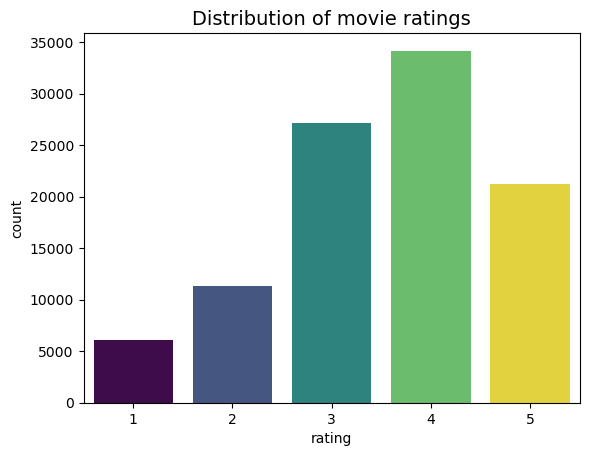

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import manquant

# Affichage du graphique avec avertissement géré
sns.countplot(x="rating", hue="rating", data=data, palette="viridis", legend=False)


plt.title("Distribution of movie ratings", fontsize=14)
plt.show()


In [26]:

print(f"Mean global rating: {round(data['rating'].mean(),2)}.")

mean_ratings = data.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 3.53.
Mean rating per user: 3.59.


In [27]:
# Which movies are most frequently rated?

In [28]:
data['movieId'].value_counts()

movieId
50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: count, Length: 1682, dtype: int64

In [29]:
movie_ratings = data.merge(item, on='movieId')
movie_ratings['title'].value_counts()[0:10]

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64

In [30]:
# star Wars (1977),Contact (1997) and Fargo (1996) have the most ratings                   

In [31]:
# What are the lowest and highest rated movies?

In [32]:
# 1. Liste des colonnes de genre
genre_cols = [
    "unknown","Action","Adventure","Animation","Children","Comedy","Crime",
    "Documentary","Drama","Fantasy","Film-Noir","Horror","Musical",
    "Mystery","Romance","Sci-Fi","Thriller","War","Western"
]

# 2. On crée une colonne 'genres' qui joint les noms
item['genres'] = item[genre_cols] \
    .apply(lambda row: "|".join([g for g, v in row.items() if v==1]), axis=1)


In [33]:
# movieId du film le moins bien noté
mean_ratings   = data.groupby('movieId')['rating'].mean()
lowest_rated   = mean_ratings.idxmin()

# Extraction en ne gardant que movieId, title et genres
result = item.loc[
    item['movieId'] == lowest_rated,
    ['movieId', 'title', 'genres']
]
print(result)


     movieId                                        title           genres
313      314  3 Ninjas: High Noon At Mega Mountain (1998)  Action|Children


In [34]:
# 3 Ninjas: High Noon At Mega Mountain (1998) has the lowest average rating.

In [35]:
mean_ratings   = data.groupby('movieId')['rating'].mean()
highest_rated =  mean_ratings.idxmax()
result = item.loc[
    item['movieId'] == highest_rated,
    ['movieId', 'title', 'genres']
]
print(result)

     movieId                          title       genres
813      814  Great Day in Harlem, A (1994)  Documentary


In [36]:
# Great Day in Harlem, A (1994) has the highest average rating

In [37]:
data[data['movieId']==highest_rated]

,userId,movieId,rating,timestamp
6519,13,814,5,886302261


In [38]:
# Great Day in Harlem, A (1994) may be the "highest" rated movie, but it only has 2 ratings. A better approach for evaluating movie popularity is to do look at the Bayesian average.

In [39]:
# Un film qui a reçu 2 notes de 5 étoiles apparaîtra mieux classé qu’un autre avec 200 notes et une moyenne de 4,2 étoiles. Ce n’est pas juste !

In [40]:
movie_stats = data.groupby('movieId')['rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
movieId,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [41]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")
def bayesian_avg(data):
    bayesian_avg = (C*m+data.sum())/(C+data.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 59.45
Average rating for a given movie: 3.08


In [42]:
# Extraire toutes les notes du film le mieux noté
top_rated_ratings = data[data['movieId'] == highest_rated]['rating']

# Calculer la moyenne bayésienne pour ce film
bayes_score = bayesian_avg(top_rated_ratings)

# Afficher les infos du film
film_info = item.loc[item['movieId'] == highest_rated, ['movieId', 'title', 'genres']].iloc[0]

print("\nFilm le mieux noté (moyenne classique) :")
print(f"Titre: {film_info['title']}")
print(f"Genres: {film_info['genres']}")
print(f"ID: {film_info['movieId']}")
print(f"Moyenne classique: {mean_ratings[highest_rated]:.3f}")
print(f"Moyenne bayésienne: {bayes_score}")


Film le mieux noté (moyenne classique) :
Titre: Great Day in Harlem, A (1994)
Genres: Documentary
ID: 814
Moyenne classique: 5.000
Moyenne bayésienne: 3.108


In [43]:
# Let's now apply bayesian_avg to all movies in our dataset.

In [44]:
bayesian_avg_ratings = data.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')

In [45]:
movie_stats = movie_stats.merge(item[['movieId', 'title']])
movie_stats.sort_values('bayesian_avg', ascending=False).head()

,movieId,count,mean,bayesian_avg,title
49,50,583,4.358491,4.240,Star Wars (1977)
317,318,298,4.466443,4.235,Schindler's List (1993)
63,64,283,4.445230,4.208,"Shawshank Redemption, The (1994)"
482,483,243,4.456790,4.185,Casablanca (1942)
11,12,267,4.385768,4.147,"Usual Suspects, The (1995)"


In [46]:
# Using the Bayesian average, we see that Star Wars (1977), Schindler's List (1993), and The Shawshank Redemption, The (1994) are the most highly rated movies. This result makes much more sense since these movies are critically acclaimed films.

In [47]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,count,mean,bayesian_avg,title
687,688,44,1.840909,2.551,Leave It to Beaver (1997)
686,687,69,2.188406,2.599,McHale's Navy (1997)
121,122,106,2.339623,2.604,"Cable Guy, The (1996)"
889,890,43,1.953488,2.605,Mortal Kombat: Annihilation (1997)
987,988,86,2.313953,2.625,"Beautician and the Beast, The (1997)"


In [48]:
# With Bayesian averaging, it looks like Leave It to Beaver (1997), McHale's Navy (1997), and Cable Guy, The (1996 are the worst rated movies.3 Ninjas: High Noon At Mega Mountain (1998) isn't so bad after all.

In [49]:
item.head()

,movieId,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Animation|Children|Comedy
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,Action|Adventure|Thriller
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Action|Comedy|Drama
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Crime|Drama|Thriller


In [50]:
# A Glimpse at Movie Genres

In [51]:
item['genres'] = item['genres'].apply(lambda x: x.split("|"))
item.head()

,movieId,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,"[Animation, Children, Comedy]"
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,"[Action, Adventure, Thriller]"
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,[Thriller]
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Action, Comedy, Drama]"
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[Crime, Drama, Thriller]"


In [52]:
# How many movie genres are there?

In [53]:
from collections import Counter

genre_frequency = Counter(g for genres in item['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 19 genres.


Counter({'Drama': 725,
         'Comedy': 505,
         'Action': 251,
         'Thriller': 251,
         'Romance': 247,
         'Adventure': 135,
         'Children': 122,
         'Crime': 109,
         'Sci-Fi': 101,
         'Horror': 92,
         'War': 71,
         'Mystery': 61,
         'Musical': 56,
         'Documentary': 50,
         'Animation': 42,
         'Western': 27,
         'Film-Noir': 24,
         'Fantasy': 22,
         'unknown': 2})

In [54]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 725), ('Comedy', 505), ('Action', 251), ('Thriller', 251), ('Romance', 247)]


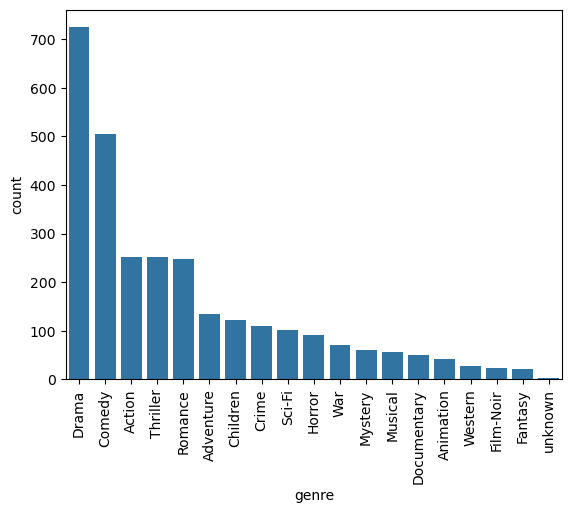

In [55]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [56]:
# Step 4: Data Pre-processing

In [57]:
# We are going to use a technique called colaborative filtering to generate recommendations for users. 
# This technique is based on the premise that similar people like similar things.


In [58]:
# La fonction create_X() sert à transformer un DataFrame contenant des notes utilisateur-film en une matrice creuse (sparse matrix). 
# C’est une étape essentielle dans les systèmes de recommandation par factorisation matricielle.

In [59]:

import numpy as np
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(data)

In [60]:
X.shape

(943, 1682)

In [61]:
# Our X matrix contains 943 users and 1682 movies

In [62]:

n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
density    = n_ratings/n_total
print(f"Matrix density   : {round(density *100,2)}%")

Matrix density   : 6.3%


In [63]:
sparsity  = 1 - density 
sparsity_percent = sparsity * 100
print(f"Sparsité : {sparsity_percent:.2f}%")

Sparsité : 93.70%


In [64]:
# 6,3 % de densité signifie que seulement 6,3 % de la matrice user×item sont renseignés.
# La sparsité est donc très élevée : 93,7 % des combinaisons user–film n’ont pas de note

In [65]:

# The cold start problem is when there are new users and movies in our matrix that do not have any ratings.
# In our Movielens dataset, all users and movies have at least one rating but in general,
# it's useful to check which users and movies have few interactions.

In [66]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

943

In [67]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 737 movies.
Least active user rated 20 movies.


In [68]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

1682

In [69]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 583 ratings.
Least rated movie has 1 ratings.


In [70]:
# Identifier la sparsité et le comportement utilisateur/film
# Il montre combien d’utilisateurs ont noté chaque film
# Il montre combien de films chaque utilisateur a notés.
# 💡 Te montre que la matrice utilisateur-film est très creuse (sparse).

# 📊 Justifie l’usage d’algorithmes robustes à la sparsité comme :

# La factorisation matricielle.

# Les modèles avec biais.

# Les modèles de type NCF avec régularisation.

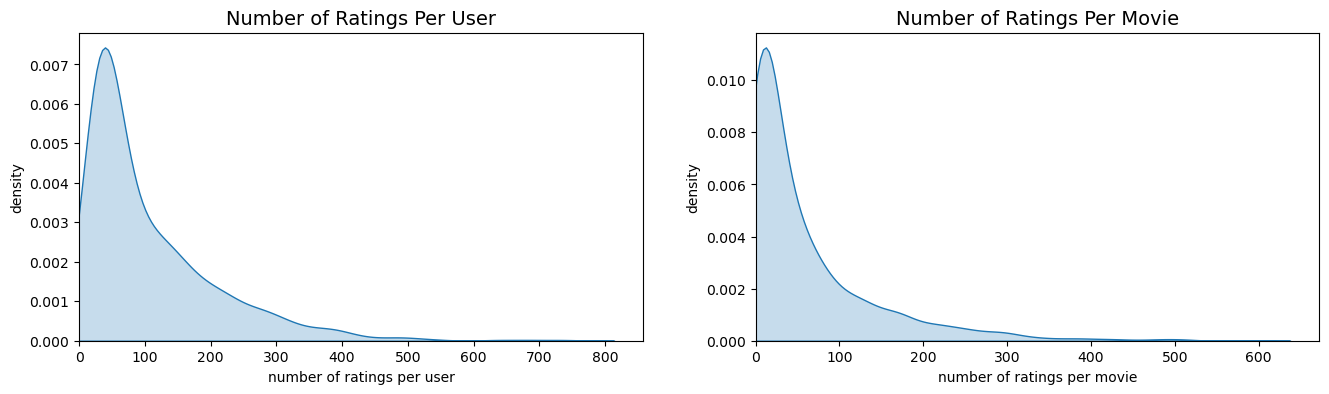

In [71]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

In [72]:
# Graphique de gauche : Number of Ratings Per User
# Forte asymétrie à droite (distribution skewed).

# Cela signifie que :

# Une petite minorité d’utilisateurs est très active (plus de 300, voire 800 notations).

# Mais la majorité des utilisateurs n’ont noté que quelques films.

# 📊 Graphique de droite : Number of Ratings Per Movie
# Même comportement : quelques films très populaires concentrent la majorité des notes.

# La plupart des films sont peu notés (moins de 50 fois).

In [73]:
# La distribution est fortement asymétrique à droite (skewed) — peu d’utilisateurs très actifs dominent un grand nombre d’interactions,
# tandis que la plupart restent modérément actifs.

In [74]:
# Là encore, la distribution est skewed : quelques films très populaires concentrent une grande part des évaluations,
# alors que la plupart des films ne sont notés que sporadiquement.

In [75]:
# Step 5: Item-item Recommendations

In [83]:
# !pip install torch


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 1.3/216.1 MB 9.5 MB/s eta 0:00:23
    --------------------------------------- 4.2/216.1 MB 11.4 MB/s eta 0:00:19
   - -------------------------------------- 7.1/216.1 MB 12.5 MB/s eta 0:00:17
   - -------------------------------------- 10.0/216.1 MB 12.7 MB/s eta 0:00:17
   -- ------------------------------------- 13.1/216.1 MB 13.5 MB/s eta 0:00:16
   -- ------------------------------------- 16.0/216.1 MB 13.2 MB/s eta 0:00:16
   --- ------------------------------------ 18.9/216.1 MB 13.4 MB/s eta 0:00:15
   ---- ----------------------------------- 22.3/216.1 MB 13.7 MB/s eta 0:00:15
   ---- ----------------------------------- 25.4/216.1 MB 13.8 MB/s eta 0:00:14
   ----- ---------------------------------- 28.0/216.1 MB 13.6 MB/s eta 0:00:14
   ----- ---------------------------------- 31.2/216.1 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [84]:
# !pip install torch-optimizer


Defaulting to user installation because normal site-packages is not writeable


In [85]:
# !pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/376.0 MB 11.2 MB/s eta 0:00:34
    --------------------------------------- 5.0/376.0 MB 13.1 MB/s eta 0:00:29
    --------------------------------------- 7.1/376.0 MB 12.1 MB/s eta 0:00:31
   - -------------------------------------- 10.2/376.0 MB 12.5 MB/s eta 0:00:30
   - -------------------------------------- 13.1/376.0 MB 12.8 MB/s eta 0:00:29
   - -------------------------------------- 16.5/376.0 MB 13.3 MB/s eta 0:00:27
   -- ------------------------------------- 19.4/376.0 MB 13.3 MB/s eta 0:00:27
   -- ------------------------------------- 22.3/376.0 MB 13.4 MB/s eta 0:00:27
   -- ------------------------------------- 25.2/376.0 MB 13.4 MB/s eta 0:00:27
   -- ------------------------------------- 27.8/376.0 MB 13.2 MB/s eta 0:00:27
   --- ------------------------------------ 30.4/376.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [86]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 1) Split train/test
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# 2) Build tf.data Datasets
# Mélange les données si shuffle=True (important pour entraîner un modèle robuste)	
# Regroupe les données en "lots" (batches) pour accélérer l’entraînement
def df_to_dataset(df, user_map, movie_map, batch_size=256, shuffle=True):
    users   = df['userId'].map(user_map).values
    movies  = df['movieId'].map(movie_map).values
    ratings = df['rating'].values.astype('float32')
    ds = tf.data.Dataset.from_tensor_slices(((users, movies), ratings))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    return ds.batch(batch_size)
# train_ds : jeu de données mélangé et découpé en batches (pour l’entraînement)
# test_ds : même chose mais non mélangé (utile pour l’évaluation)
train_ds = df_to_dataset(train_df, user_mapper, movie_mapper)
test_ds  = df_to_dataset(test_df,  user_mapper, movie_mapper, shuffle=False)



In [87]:
# La fonction create_X() sert à créer une matrice creuse (X) pour d’éventuels algorithmes de filtrage collaboratif matriciel classique (genre SVD, ALS, etc.),
# tandis que df_to_dataset() prépare les mêmes données,
# mais pour les réseaux de neurones TensorFlow,
# qui ont besoin d’un format spécifique (tf.data.Dataset)

In [88]:
# La régularisation L2 pénalise les poids trop grands, donc force le modèle à rester plus "simple" et généraliste.
# La régularisation agit comme une contrainte mathématique pour empêcher les vecteurs d’embedding ou les poids du réseau de devenir trop extrêmes.

In [89]:

from tensorflow.keras.regularizers import l2

class MFModel(tf.keras.Model):
    def __init__(self, n_users, n_items, emb_dim=20, reg_lambda=1e-6):  # ← reg_lambda = coefficient de L2
        super().__init__()
        self.user_emb = tf.keras.layers.Embedding(
            n_users, emb_dim, 
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)  # ← régularisation L2
        )
        self.item_emb = tf.keras.layers.Embedding(
            n_items, emb_dim, 
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )

    def call(self, inputs):
        u, i = inputs
        u_vec = self.user_emb(u)
        i_vec = self.item_emb(i)
        return tf.reduce_sum(u_vec * i_vec, axis=1)
n_users = len(user_mapper)
n_items = len(movie_mapper)

In [90]:
# movie_map prépare les indices que tu passes au modèle.

# item_emb est la couche dans le modèle qui va utiliser ces indices pour récupérer le vecteur embedding correspondant.

In [91]:
# 4) Loop over optimizers, time & collect
results = []
for opt_name, opt in [
    ('SGD',     tf.keras.optimizers.SGD(learning_rate=0.01)),
    ('Adagrad', tf.keras.optimizers.Adagrad(learning_rate=0.01)),
    ('Adam',    tf.keras.optimizers.Adam(learning_rate=0.01)),
    ('FTRL',    tf.keras.optimizers.Ftrl(learning_rate=0.01))
]:
    print(f"\n=== Training with {opt_name} ===")
    model = MFModel(n_users, n_items, emb_dim=50, reg_lambda=1e-5)

    model.compile(
        optimizer=opt,
        loss='mse',
        metrics=[
            tf.keras.metrics.RootMeanSquaredError(name='rmse'),
            tf.keras.metrics.MeanAbsoluteError(name='mae')
        ]
    )
 # Mesure le temps d'entraînement sur 5 époques, puis calcule la durée.
    t0 = time.time()
    history = model.fit(train_ds, epochs=5, verbose=2)
    train_time = time.time() - t0
 # Évalue le modèle sur les données de test (test_ds) et récupère les valeurs de la perte, RMSE, et MAE.
    print("Evaluating on test set:")
    eval_res = model.evaluate(test_ds, verbose=2)
    # model.evaluate returns [loss, rmse, mae]
    test_rmse = eval_res[1]
    test_mae  = eval_res[2]
# Stocke les résultats de l’optimiseur courant sous forme de dictionnaire dans la liste results
    results.append({
        'Optimizer':       opt_name,
        'Train Time (s)':  round(train_time, 2),
        'Test RMSE':       round(test_rmse, 4),
        'Test MAE':        round(test_mae, 4)
    })



=== Training with SGD ===
Epoch 1/5
313/313 - 3s - 10ms/step - loss: 13.7404 - mae: 3.5313 - rmse: 3.7065
Epoch 2/5
313/313 - 2s - 5ms/step - loss: 13.7400 - mae: 3.5313 - rmse: 3.7065
Epoch 3/5
313/313 - 3s - 8ms/step - loss: 13.7397 - mae: 3.5312 - rmse: 3.7064
Epoch 4/5
313/313 - 2s - 5ms/step - loss: 13.7393 - mae: 3.5313 - rmse: 3.7064
Epoch 5/5
313/313 - 3s - 8ms/step - loss: 13.7390 - mae: 3.5310 - rmse: 3.7063
Evaluating on test set:
79/79 - 1s - 8ms/step - loss: 13.6856 - mae: 3.5254 - rmse: 3.6991

=== Training with Adagrad ===
Epoch 1/5
313/313 - 3s - 11ms/step - loss: 13.7401 - mae: 3.5311 - rmse: 3.7065
Epoch 2/5
313/313 - 3s - 8ms/step - loss: 13.7389 - mae: 3.5312 - rmse: 3.7063
Epoch 3/5
313/313 - 3s - 8ms/step - loss: 13.7377 - mae: 3.5308 - rmse: 3.7062
Epoch 4/5
313/313 - 2s - 6ms/step - loss: 13.7364 - mae: 3.5307 - rmse: 3.7060
Epoch 5/5
313/313 - 3s - 8ms/step - loss: 13.7350 - mae: 3.5306 - rmse: 3.7058
Evaluating on test set:
79/79 - 1s - 8ms/step - loss: 13.68

In [92]:
# 5) Show summary table
df_results = pd.DataFrame(results)
print("\nSummary of all optimizers:")
print(df_results)


Summary of all optimizers:
  Optimizer  Train Time (s)  Test RMSE  Test MAE
0       SGD           11.58     3.6991    3.5254
1   Adagrad           12.84     3.6990    3.5253
2      Adam           11.90     1.0635    0.8368
3      FTRL           11.98     3.6991    3.5254


In [97]:

# !pip uninstall torch -y
# !pip cache purge
# !pip install torch --force-reinstall


  Optimizer  Train Time (s)  Test RMSE  Test MAE
0       SGD           11.58     3.6991    3.5254
1   Adagrad           12.84     3.6990    3.5253
2      Adam           11.90     1.0635    0.8368
3      FTRL           11.98     3.6991    3.5254


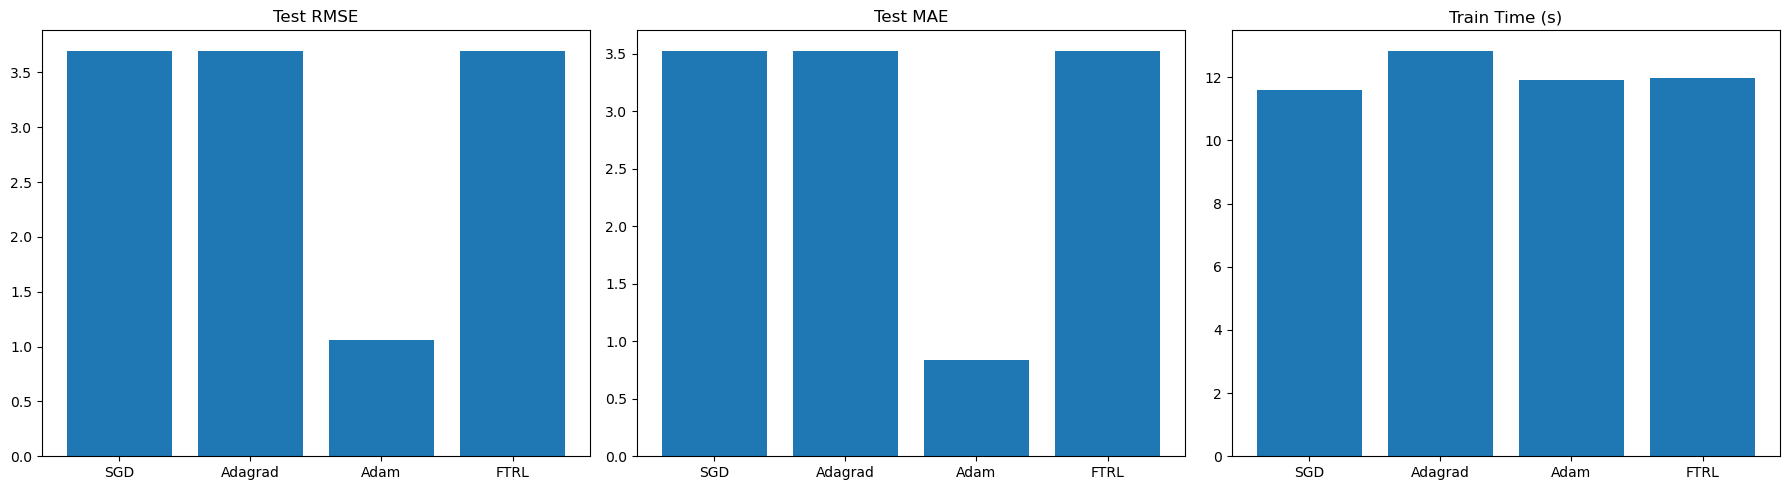

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `results` was defined by your MF training loop
df_results = pd.DataFrame(results)
print(df_results)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].bar(df_results['Optimizer'], df_results['Test RMSE'])
axes[0].set_title('Test RMSE')
axes[1].bar(df_results['Optimizer'], df_results['Test MAE'])
axes[1].set_title('Test MAE')
axes[2].bar(df_results['Optimizer'], df_results['Train Time (s)'])
axes[2].set_title('Train Time (s)')
plt.tight_layout()
plt.show()

df_results.to_csv('mf_optimizer_comparison.csv', index=False)


In [99]:
# Ce code réalise une recherche d’hyperparamètres (appelée aussi grid search) pour entraîner et évaluer un modèle de factorisation matricielle (MFModel) avec TensorFlow. Il teste plusieurs combinaisons de :

# dimensions d’embedding (embedding_dims)

# taux d’apprentissage (learning_rates)

# tailles de batch (batch_sizes)

In [100]:
# pour ADAM

In [101]:


import time
import itertools
import pandas as pd
import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Hyperparamètres à tester
embedding_dims = [10, 20, 50]
learning_rates = [0.001, 0.01]
batch_sizes = [128, 256]
reg_lambdas = [0.0, 1e-5, 1e-4]  # ← régularisation L2

# Résultats
results_hp = []

# Modèle MF avec support de la régularisation
class MFModel(tf.keras.Model):
    def __init__(self, n_users, n_items, emb_dim=20, reg_lambda=0.0):
        super().__init__()
        self.user_emb = tf.keras.layers.Embedding(
            n_users, emb_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )
        self.item_emb = tf.keras.layers.Embedding(
            n_items, emb_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )

    def call(self, inputs):
        u, i = inputs
        u_vec = self.user_emb(u)
        i_vec = self.item_emb(i)
        return tf.reduce_sum(u_vec * i_vec, axis=1)

# Boucle sur toutes les combinaisons d'hyperparamètres
for emb_dim, lr, batch_size, reg_lambda in itertools.product(
    embedding_dims, learning_rates, batch_sizes, reg_lambdas):

    print(f"\n=== Training: emb_dim={emb_dim}, lr={lr}, bs={batch_size}, reg_lambda={reg_lambda} ===")

    # Reconstruire les datasets avec ce batch_size
    train_ds = df_to_dataset(train_df, user_mapper, movie_mapper, batch_size=batch_size)
    test_ds  = df_to_dataset(test_df,  user_mapper, movie_mapper, batch_size=batch_size, shuffle=False)

    # Construire le modèle avec régularisation
    model = MFModel(n_users, n_items, emb_dim=emb_dim, reg_lambda=reg_lambda)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=[
            tf.keras.metrics.RootMeanSquaredError(name='rmse'),
            tf.keras.metrics.MeanAbsoluteError(name='mae')
        ]
    )

    # Entraînement
    t0 = time.time()
    model.fit(train_ds, epochs=5, verbose=0)
    train_time = time.time() - t0

    # Évaluation
    eval_res = model.evaluate(test_ds, verbose=0)
    test_rmse = eval_res[1]
    test_mae  = eval_res[2]

    # Sauvegarde du résultat
    results_hp.append({
        'Embedding Dim': emb_dim,
        'Learning Rate': lr,
        'Batch Size':    batch_size,
        'Reg Lambda':    reg_lambda,
        'Train Time (s)': round(train_time, 2),
        'Test RMSE':      round(test_rmse, 4),
        'Test MAE':       round(test_mae, 4)
    })

# Résumé dans DataFrame
df_hp = pd.DataFrame(results_hp)
print(df_hp)
df_hp.to_csv('mf_hyperparameter_search_with_regularization_adamfn.csv', index=False)



=== Training: emb_dim=10, lr=0.001, bs=128, reg_lambda=0.0 ===

=== Training: emb_dim=10, lr=0.001, bs=128, reg_lambda=1e-05 ===

=== Training: emb_dim=10, lr=0.001, bs=128, reg_lambda=0.0001 ===

=== Training: emb_dim=10, lr=0.001, bs=256, reg_lambda=0.0 ===

=== Training: emb_dim=10, lr=0.001, bs=256, reg_lambda=1e-05 ===

=== Training: emb_dim=10, lr=0.001, bs=256, reg_lambda=0.0001 ===

=== Training: emb_dim=10, lr=0.01, bs=128, reg_lambda=0.0 ===

=== Training: emb_dim=10, lr=0.01, bs=128, reg_lambda=1e-05 ===

=== Training: emb_dim=10, lr=0.01, bs=128, reg_lambda=0.0001 ===

=== Training: emb_dim=10, lr=0.01, bs=256, reg_lambda=0.0 ===

=== Training: emb_dim=10, lr=0.01, bs=256, reg_lambda=1e-05 ===

=== Training: emb_dim=10, lr=0.01, bs=256, reg_lambda=0.0001 ===

=== Training: emb_dim=20, lr=0.001, bs=128, reg_lambda=0.0 ===

=== Training: emb_dim=20, lr=0.001, bs=128, reg_lambda=1e-05 ===

=== Training: emb_dim=20, lr=0.001, bs=128, reg_lambda=0.0001 ===

=== Training: emb_di

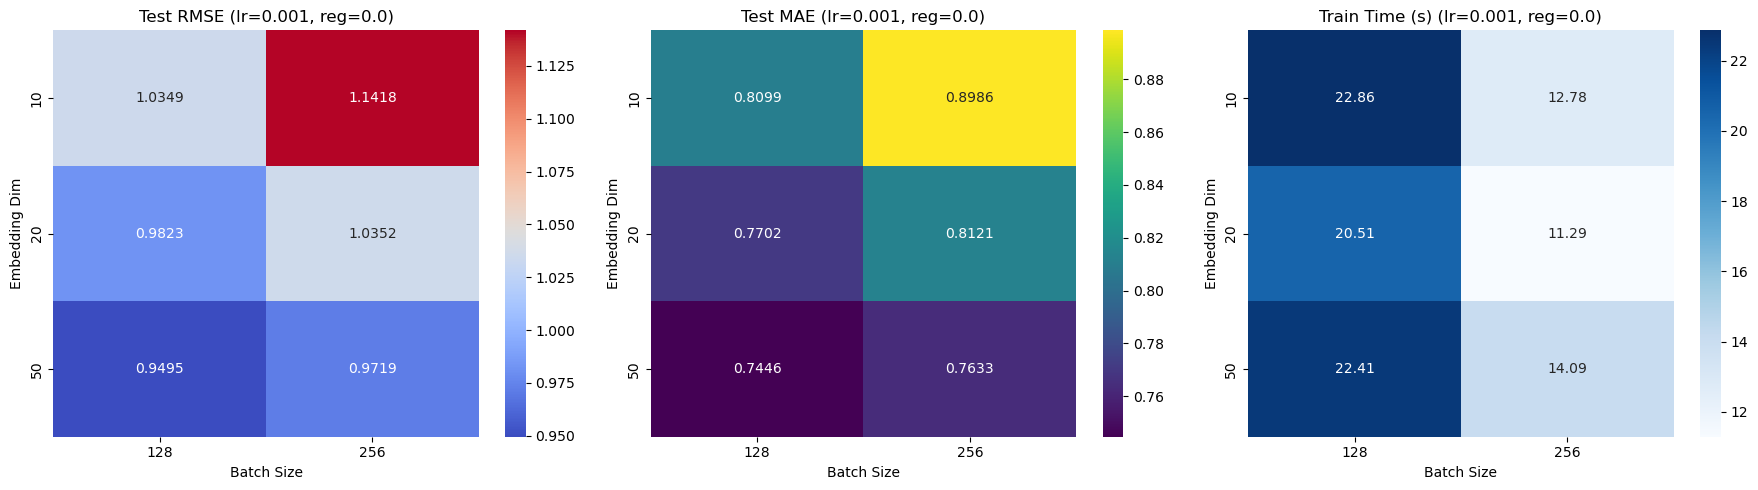

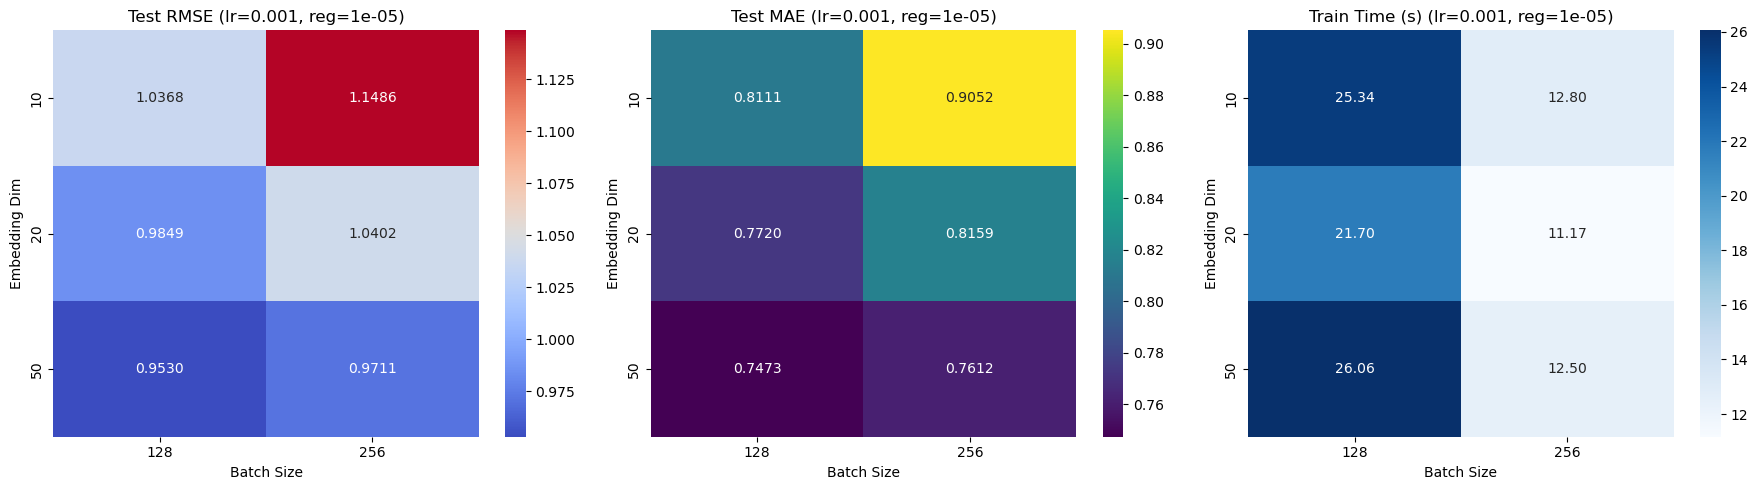

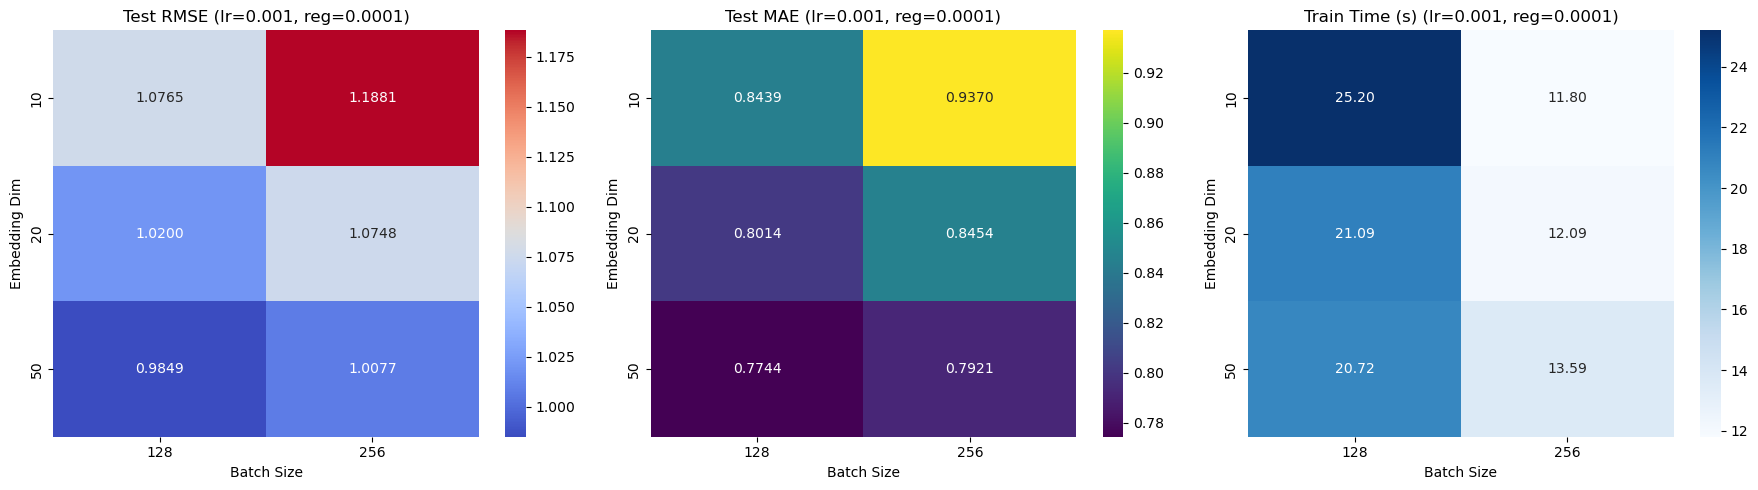

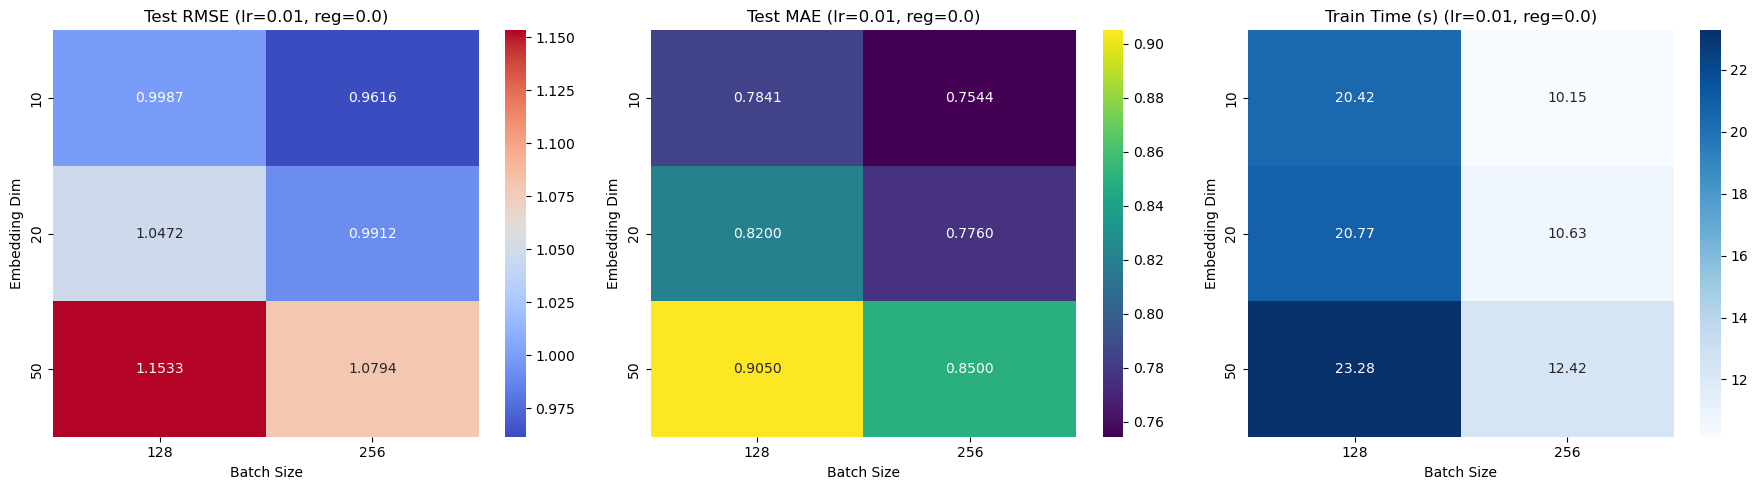

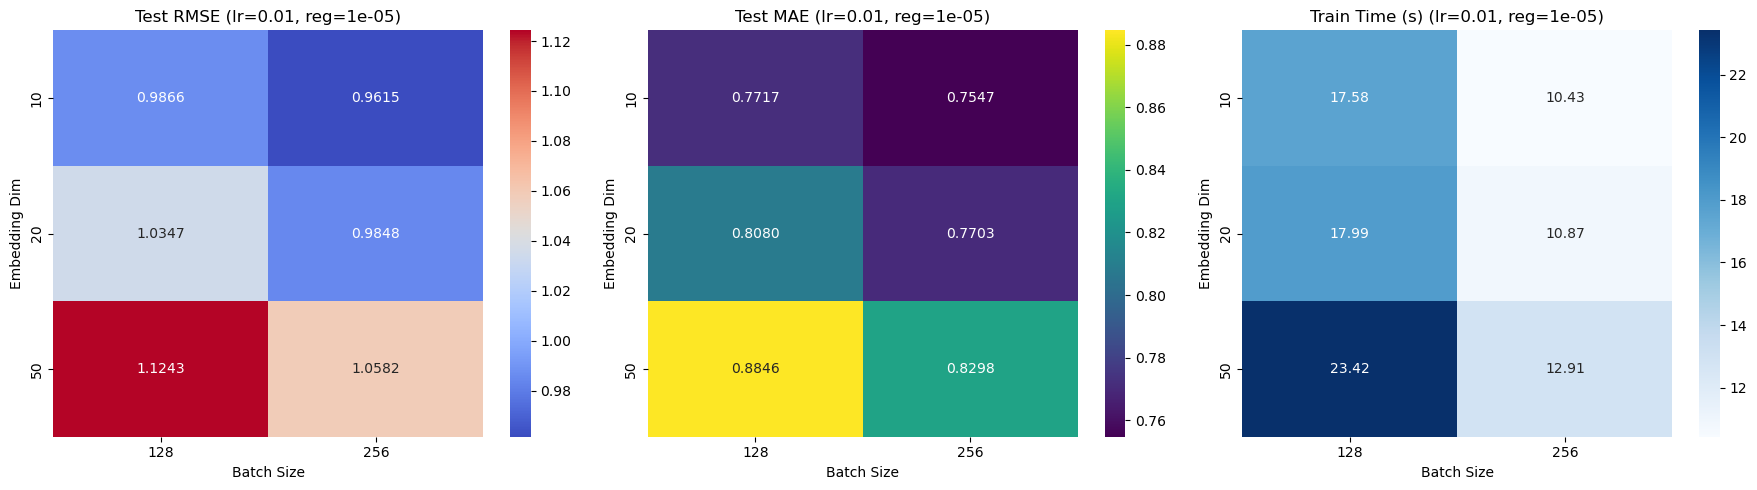

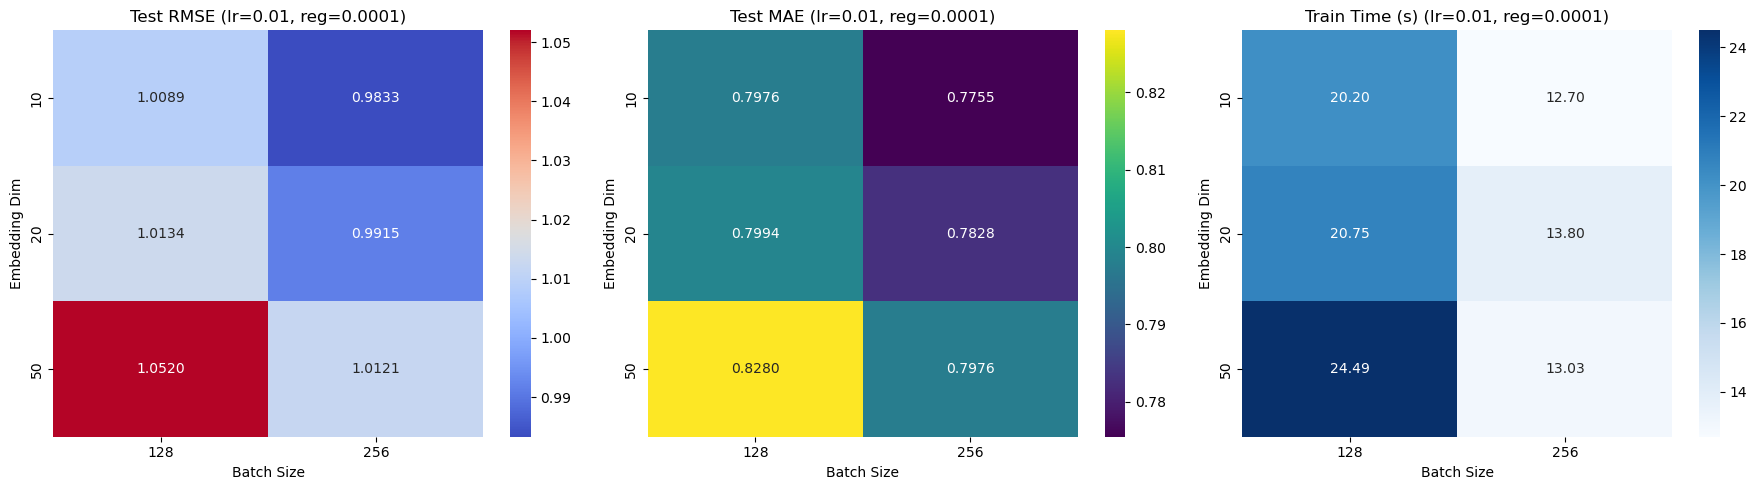

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les résultats depuis le fichier CSV
df = pd.read_csv('mf_hyperparameter_search_with_regularization_adamfn.csv')

# Choisir un learning rate pour filtrer la visualisation
for lr in df['Learning Rate'].unique():
    subset = df[df['Learning Rate'] == lr]

    for reg in sorted(subset['Reg Lambda'].unique()):
        reg_subset = subset[subset['Reg Lambda'] == reg]

        pivot_rmse = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Test RMSE')
        pivot_mae = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Test MAE')
        pivot_time = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Train Time (s)')

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        sns.heatmap(pivot_rmse, annot=True, fmt=".4f", ax=axes[0], cmap='coolwarm')
        axes[0].set_title(f'Test RMSE (lr={lr}, reg={reg})')

        sns.heatmap(pivot_mae, annot=True, fmt=".4f", ax=axes[1], cmap='viridis')
        axes[1].set_title(f'Test MAE (lr={lr}, reg={reg})')

        sns.heatmap(pivot_time, annot=True, fmt=".2f", ax=axes[2], cmap='Blues')
        axes[2].set_title(f'Train Time (s) (lr={lr}, reg={reg})')

        plt.tight_layout()
        plt.show()


In [103]:
# Adagrad

In [104]:


import time
import itertools
import pandas as pd
import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Hyperparamètres à tester
embedding_dims = [10, 20, 50]
learning_rates = [0.001, 0.01]
batch_sizes = [128, 256]
reg_lambdas = [0.0, 1e-5, 1e-4]  # ← Régularisation L2

# Résultats
results_hp = []

# Définir modèle MF avec régularisation
class MFModel(tf.keras.Model):
    def __init__(self, n_users, n_items, emb_dim=20, reg_lambda=0.0):
        super().__init__()
        self.user_emb = tf.keras.layers.Embedding(
            n_users, emb_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )
        self.item_emb = tf.keras.layers.Embedding(
            n_items, emb_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )

    def call(self, inputs):
        u, i = inputs
        u_vec = self.user_emb(u)
        i_vec = self.item_emb(i)
        return tf.reduce_sum(u_vec * i_vec, axis=1)

# Boucle sur toutes les combinaisons
for emb_dim, lr, batch_size, reg_lambda in itertools.product(
    embedding_dims, learning_rates, batch_sizes, reg_lambdas):

    print(f"\n=== Training Adagrad: emb_dim={emb_dim}, lr={lr}, bs={batch_size}, reg_lambda={reg_lambda} ===")

    train_ds = df_to_dataset(train_df, user_mapper, movie_mapper, batch_size=batch_size)
    test_ds  = df_to_dataset(test_df,  user_mapper, movie_mapper, batch_size=batch_size, shuffle=False)

    model = MFModel(n_users, n_items, emb_dim=emb_dim, reg_lambda=reg_lambda)
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=[
            tf.keras.metrics.RootMeanSquaredError(name='rmse'),
            tf.keras.metrics.MeanAbsoluteError(name='mae')
        ]
    )

    t0 = time.time()
    model.fit(train_ds, epochs=5, verbose=0)
    train_time = time.time() - t0

    eval_res = model.evaluate(test_ds, verbose=0)
    test_rmse = eval_res[1]
    test_mae  = eval_res[2]

    results_hp.append({
        'Optimizer':      'Adagrad',
        'Embedding Dim':  emb_dim,
        'Learning Rate':  lr,
        'Batch Size':     batch_size,
        'Reg Lambda':     reg_lambda,
        'Train Time (s)': round(train_time, 2),
        'Test RMSE':      round(test_rmse, 4),
        'Test MAE':       round(test_mae, 4)
    })

# Résumé
df_hp = pd.DataFrame(results_hp)
print(df_hp)
df_hp.to_csv('mf_hyperparameter_search_adagradfn.csv', index=False)



=== Training Adagrad: emb_dim=10, lr=0.001, bs=128, reg_lambda=0.0 ===

=== Training Adagrad: emb_dim=10, lr=0.001, bs=128, reg_lambda=1e-05 ===

=== Training Adagrad: emb_dim=10, lr=0.001, bs=128, reg_lambda=0.0001 ===

=== Training Adagrad: emb_dim=10, lr=0.001, bs=256, reg_lambda=0.0 ===

=== Training Adagrad: emb_dim=10, lr=0.001, bs=256, reg_lambda=1e-05 ===

=== Training Adagrad: emb_dim=10, lr=0.001, bs=256, reg_lambda=0.0001 ===

=== Training Adagrad: emb_dim=10, lr=0.01, bs=128, reg_lambda=0.0 ===

=== Training Adagrad: emb_dim=10, lr=0.01, bs=128, reg_lambda=1e-05 ===

=== Training Adagrad: emb_dim=10, lr=0.01, bs=128, reg_lambda=0.0001 ===

=== Training Adagrad: emb_dim=10, lr=0.01, bs=256, reg_lambda=0.0 ===

=== Training Adagrad: emb_dim=10, lr=0.01, bs=256, reg_lambda=1e-05 ===

=== Training Adagrad: emb_dim=10, lr=0.01, bs=256, reg_lambda=0.0001 ===

=== Training Adagrad: emb_dim=20, lr=0.001, bs=128, reg_lambda=0.0 ===

=== Training Adagrad: emb_dim=20, lr=0.001, bs=12

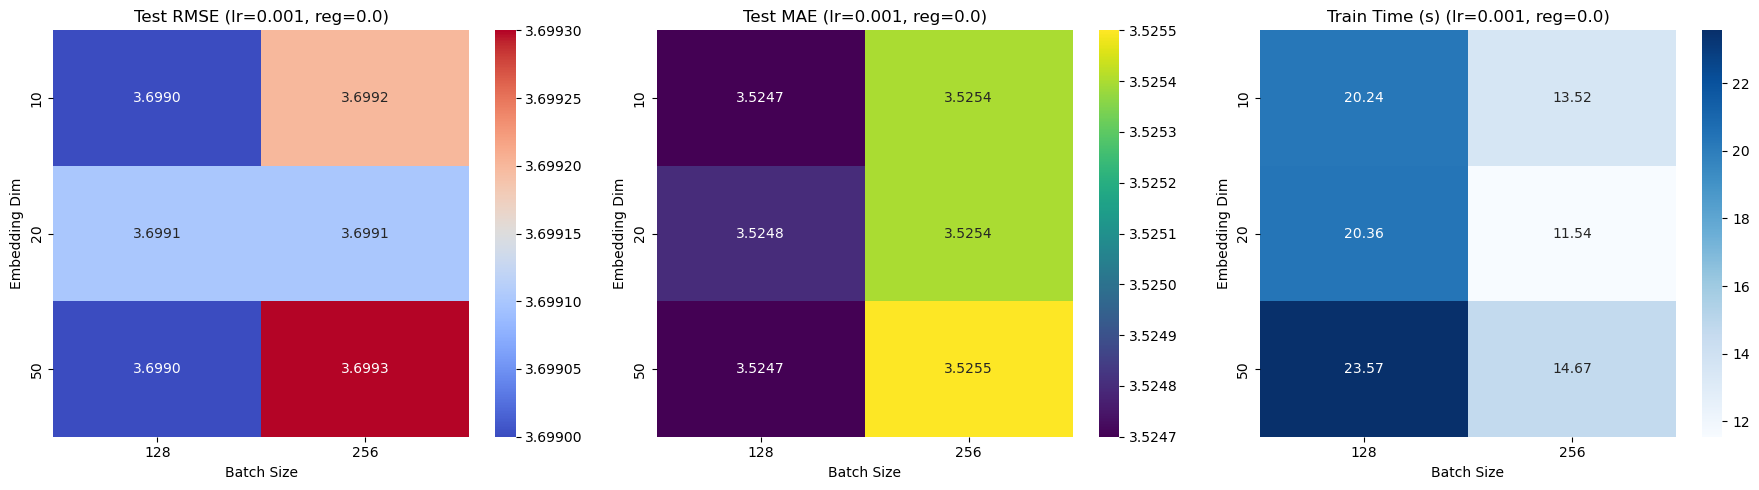

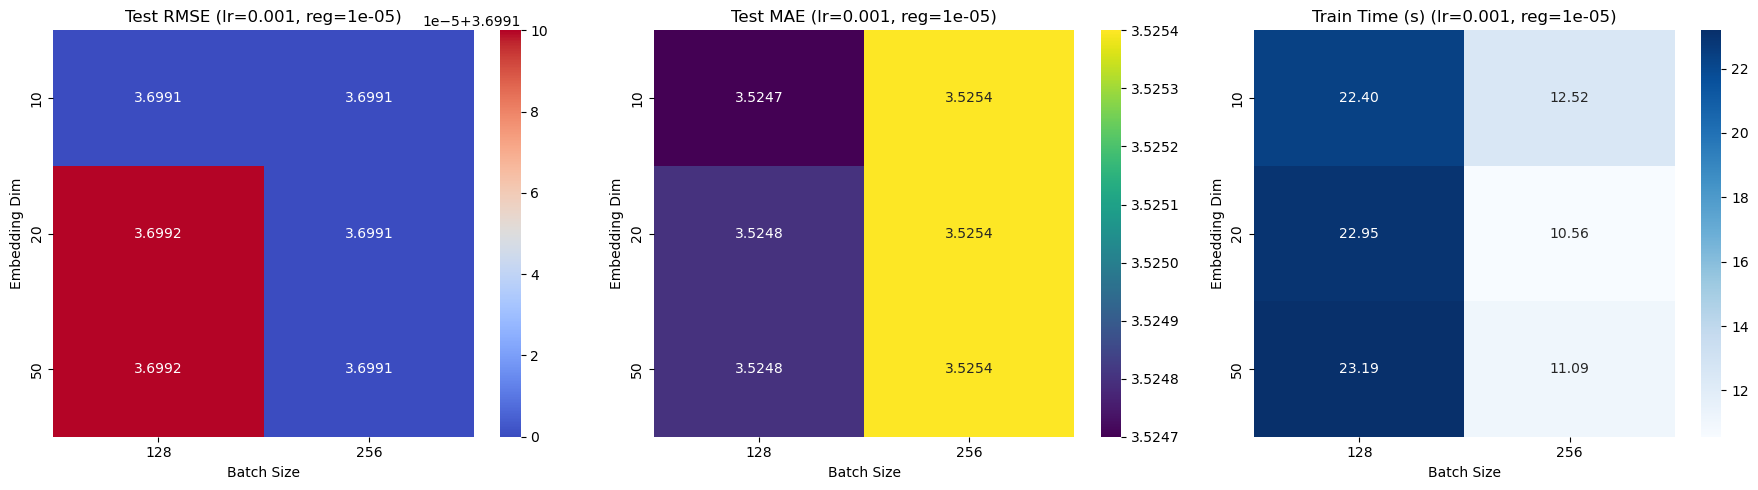

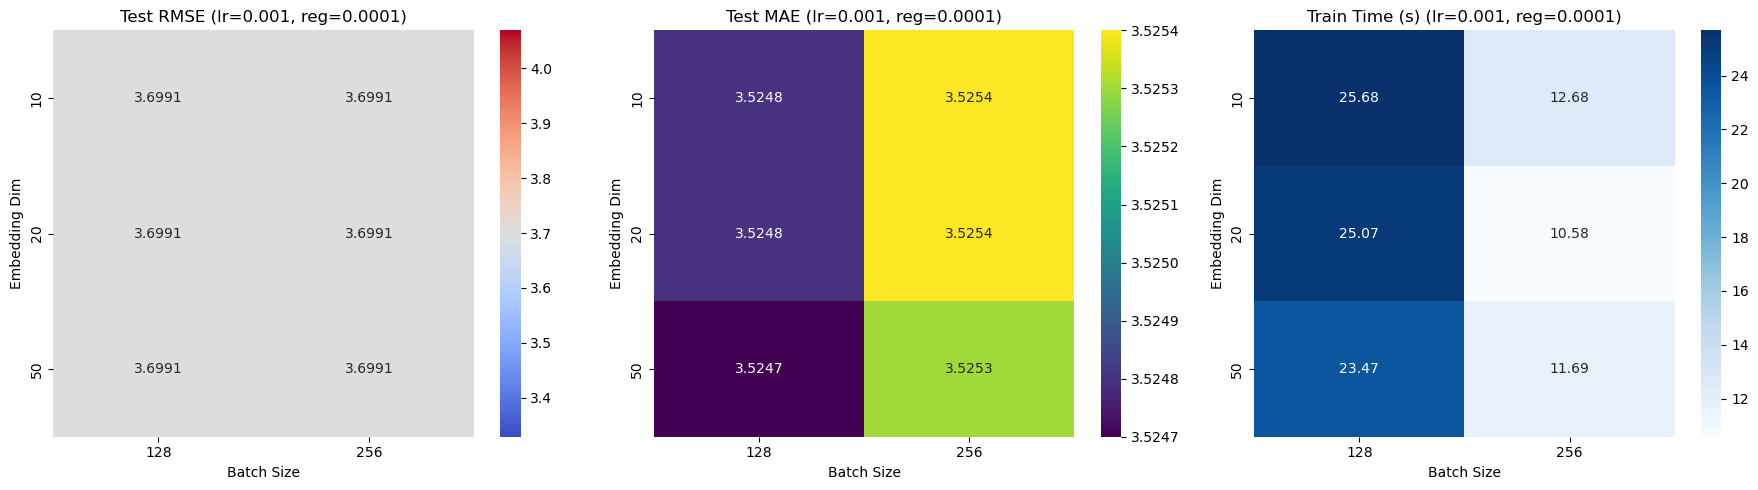

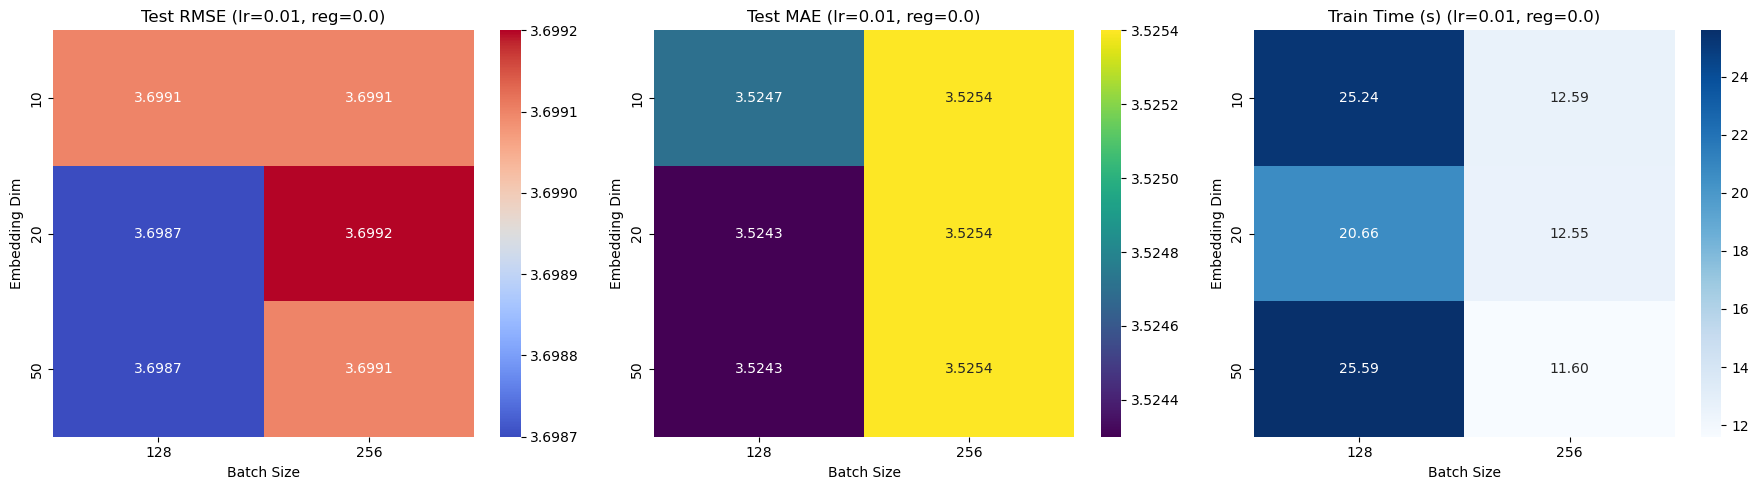

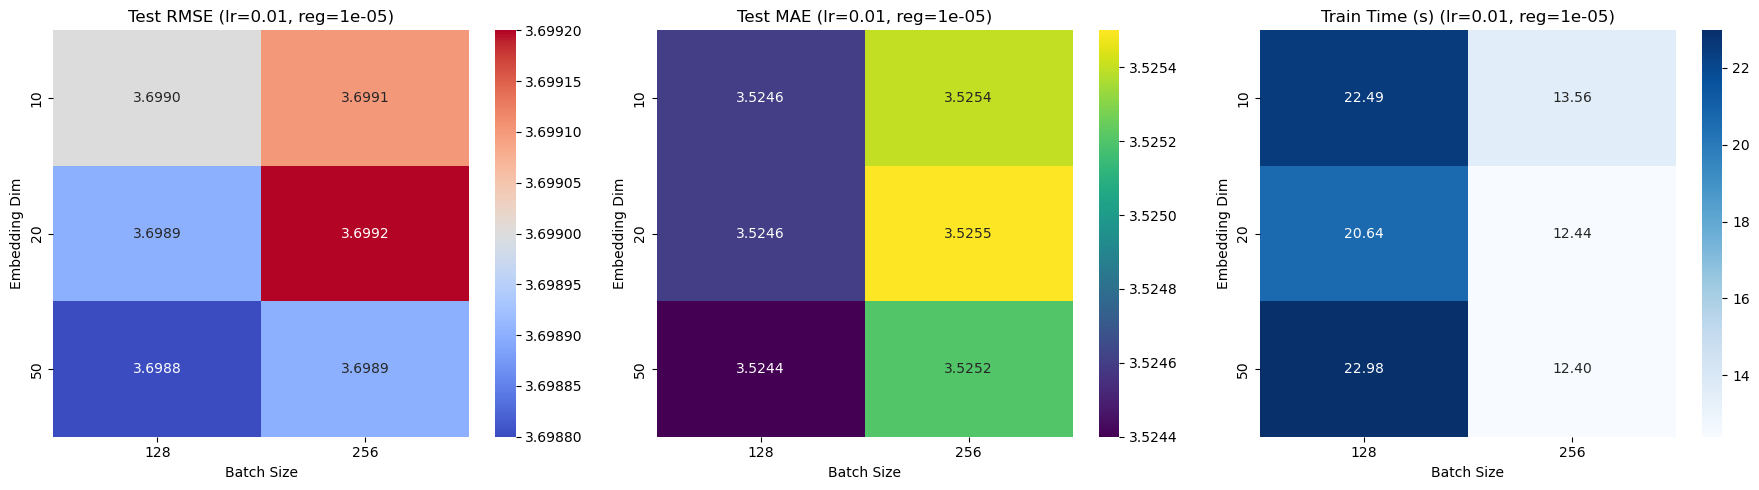

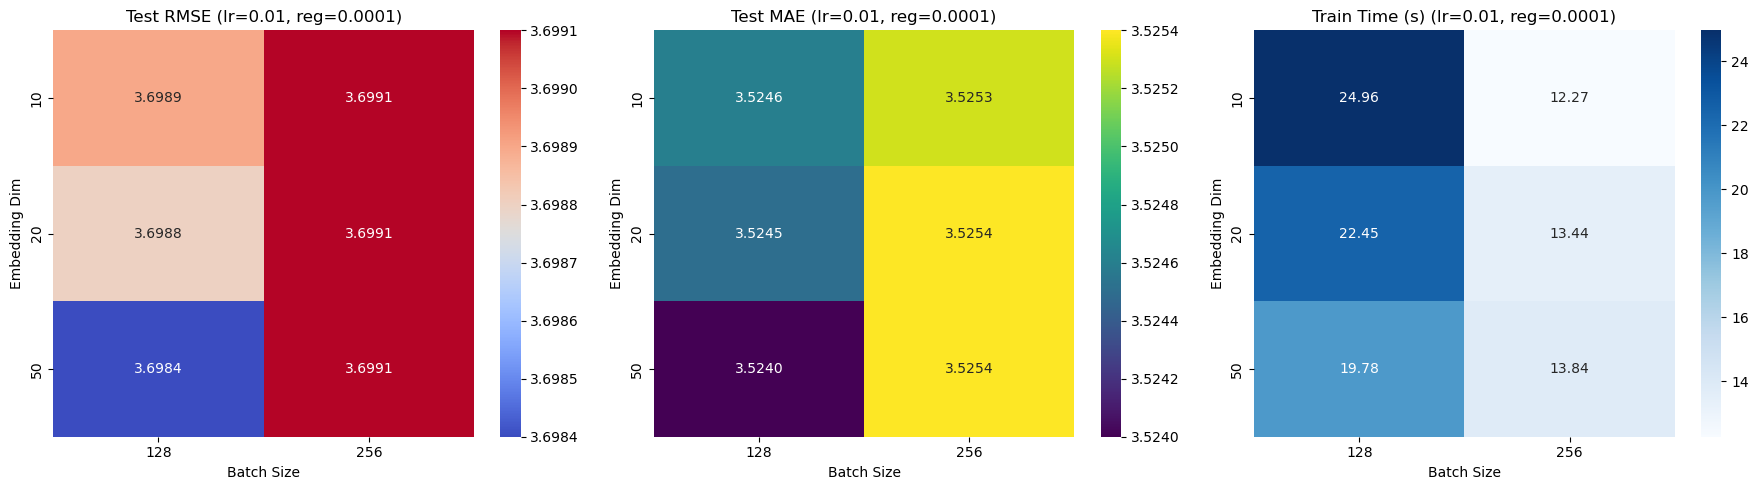

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les résultats depuis le fichier CSV
df = pd.read_csv('mf_hyperparameter_search_adagradfn.csv')

# Choisir un learning rate pour filtrer la visualisation
for lr in df['Learning Rate'].unique():
    subset = df[df['Learning Rate'] == lr]

    for reg in sorted(subset['Reg Lambda'].unique()):
        reg_subset = subset[subset['Reg Lambda'] == reg]

        pivot_rmse = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Test RMSE')
        pivot_mae = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Test MAE')
        pivot_time = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Train Time (s)')

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        sns.heatmap(pivot_rmse, annot=True, fmt=".4f", ax=axes[0], cmap='coolwarm')
        axes[0].set_title(f'Test RMSE (lr={lr}, reg={reg})')

        sns.heatmap(pivot_mae, annot=True, fmt=".4f", ax=axes[1], cmap='viridis')
        axes[1].set_title(f'Test MAE (lr={lr}, reg={reg})')

        sns.heatmap(pivot_time, annot=True, fmt=".2f", ax=axes[2], cmap='Blues')
        axes[2].set_title(f'Train Time (s) (lr={lr}, reg={reg})')

        plt.tight_layout()
        plt.show()


In [106]:
# SGD

In [107]:

import time
import itertools
import pandas as pd
import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Hyperparamètres à tester
embedding_dims = [10, 20, 50]
learning_rates = [0.001, 0.01]
batch_sizes = [128, 256]
reg_lambdas = [0.0, 1e-5, 1e-4]  # ← Régularisation L2

# Résultats
results_hp = []

# Définir modèle MF avec régularisation
class MFModel(tf.keras.Model):
    def __init__(self, n_users, n_items, emb_dim=20, reg_lambda=0.0):
        super().__init__()
        self.user_emb = tf.keras.layers.Embedding(
            n_users, emb_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )
        self.item_emb = tf.keras.layers.Embedding(
            n_items, emb_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )

    def call(self, inputs):
        u, i = inputs
        u_vec = self.user_emb(u)
        i_vec = self.item_emb(i)
        return tf.reduce_sum(u_vec * i_vec, axis=1)

# Boucle sur toutes les combinaisons
for emb_dim, lr, batch_size, reg_lambda in itertools.product(
    embedding_dims, learning_rates, batch_sizes, reg_lambdas):

    print(f"\n=== Training SGD: emb_dim={emb_dim}, lr={lr}, bs={batch_size}, reg_lambda={reg_lambda} ===")

    train_ds = df_to_dataset(train_df, user_mapper, movie_mapper, batch_size=batch_size)
    test_ds  = df_to_dataset(test_df,  user_mapper, movie_mapper, batch_size=batch_size, shuffle=False)

    model = MFModel(n_users, n_items, emb_dim=emb_dim, reg_lambda=reg_lambda)
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=[
            tf.keras.metrics.RootMeanSquaredError(name='rmse'),
            tf.keras.metrics.MeanAbsoluteError(name='mae')
        ]
    )

    t0 = time.time()
    model.fit(train_ds, epochs=5, verbose=0)
    train_time = time.time() - t0

    eval_res = model.evaluate(test_ds, verbose=0)
    test_rmse = eval_res[1]
    test_mae  = eval_res[2]

    results_hp.append({
        'Optimizer':      'SGD',
        'Embedding Dim':  emb_dim,
        'Learning Rate':  lr,
        'Batch Size':     batch_size,
        'Reg Lambda':     reg_lambda,
        'Train Time (s)': round(train_time, 2),
        'Test RMSE':      round(test_rmse, 4),
        'Test MAE':       round(test_mae, 4)
    })

# Résumé
df_hp = pd.DataFrame(results_hp)
print(df_hp)
df_hp.to_csv('mf_hyperparameter_search_sgd_l2.csv', index=False)



=== Training SGD: emb_dim=10, lr=0.001, bs=128, reg_lambda=0.0 ===

=== Training SGD: emb_dim=10, lr=0.001, bs=128, reg_lambda=1e-05 ===

=== Training SGD: emb_dim=10, lr=0.001, bs=128, reg_lambda=0.0001 ===

=== Training SGD: emb_dim=10, lr=0.001, bs=256, reg_lambda=0.0 ===

=== Training SGD: emb_dim=10, lr=0.001, bs=256, reg_lambda=1e-05 ===

=== Training SGD: emb_dim=10, lr=0.001, bs=256, reg_lambda=0.0001 ===

=== Training SGD: emb_dim=10, lr=0.01, bs=128, reg_lambda=0.0 ===

=== Training SGD: emb_dim=10, lr=0.01, bs=128, reg_lambda=1e-05 ===

=== Training SGD: emb_dim=10, lr=0.01, bs=128, reg_lambda=0.0001 ===

=== Training SGD: emb_dim=10, lr=0.01, bs=256, reg_lambda=0.0 ===

=== Training SGD: emb_dim=10, lr=0.01, bs=256, reg_lambda=1e-05 ===

=== Training SGD: emb_dim=10, lr=0.01, bs=256, reg_lambda=0.0001 ===

=== Training SGD: emb_dim=20, lr=0.001, bs=128, reg_lambda=0.0 ===

=== Training SGD: emb_dim=20, lr=0.001, bs=128, reg_lambda=1e-05 ===

=== Training SGD: emb_dim=20, l

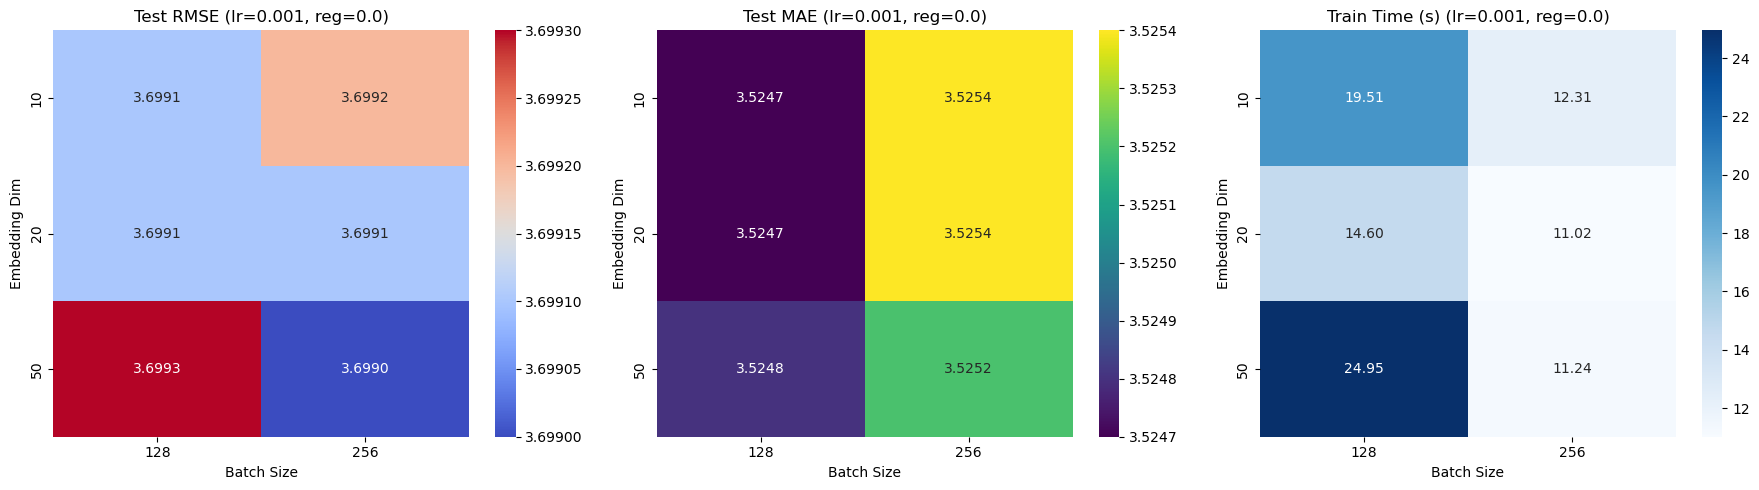

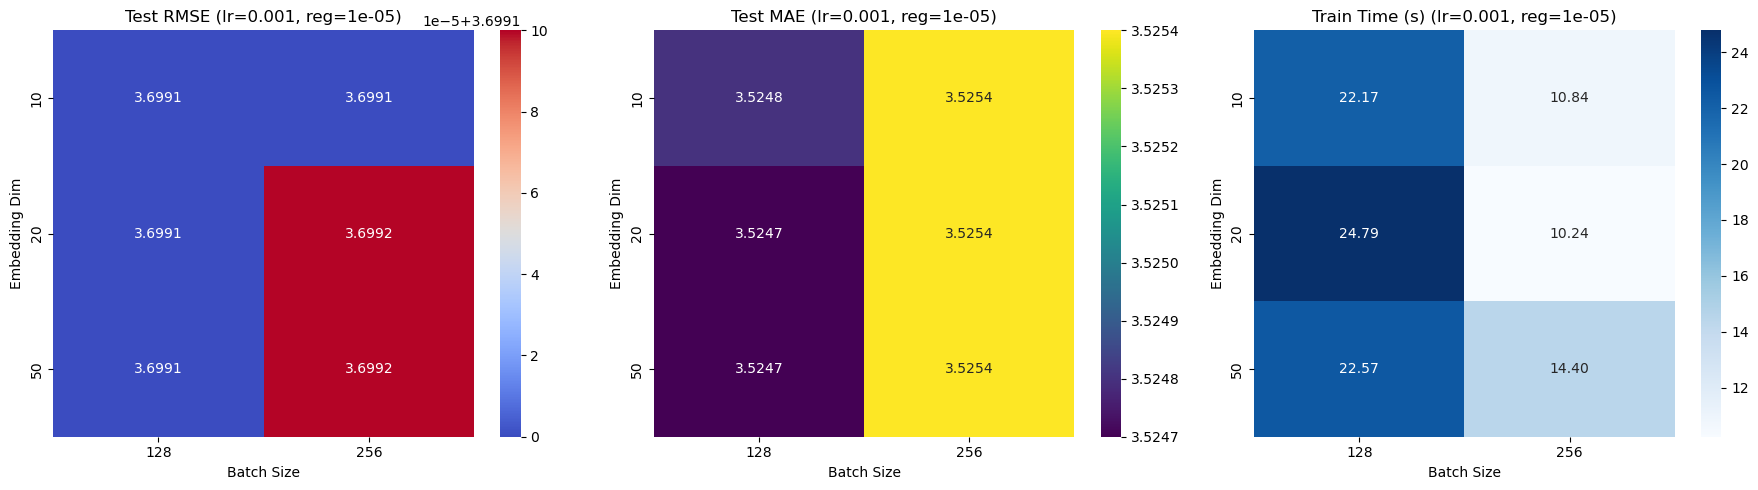

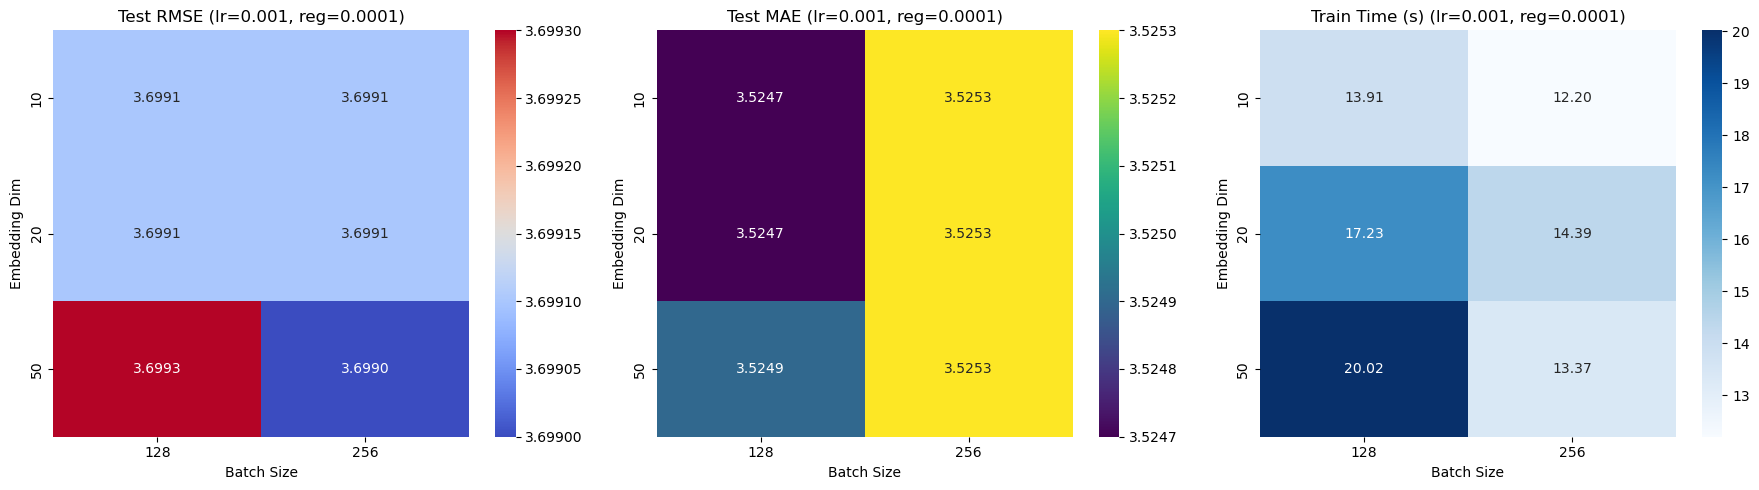

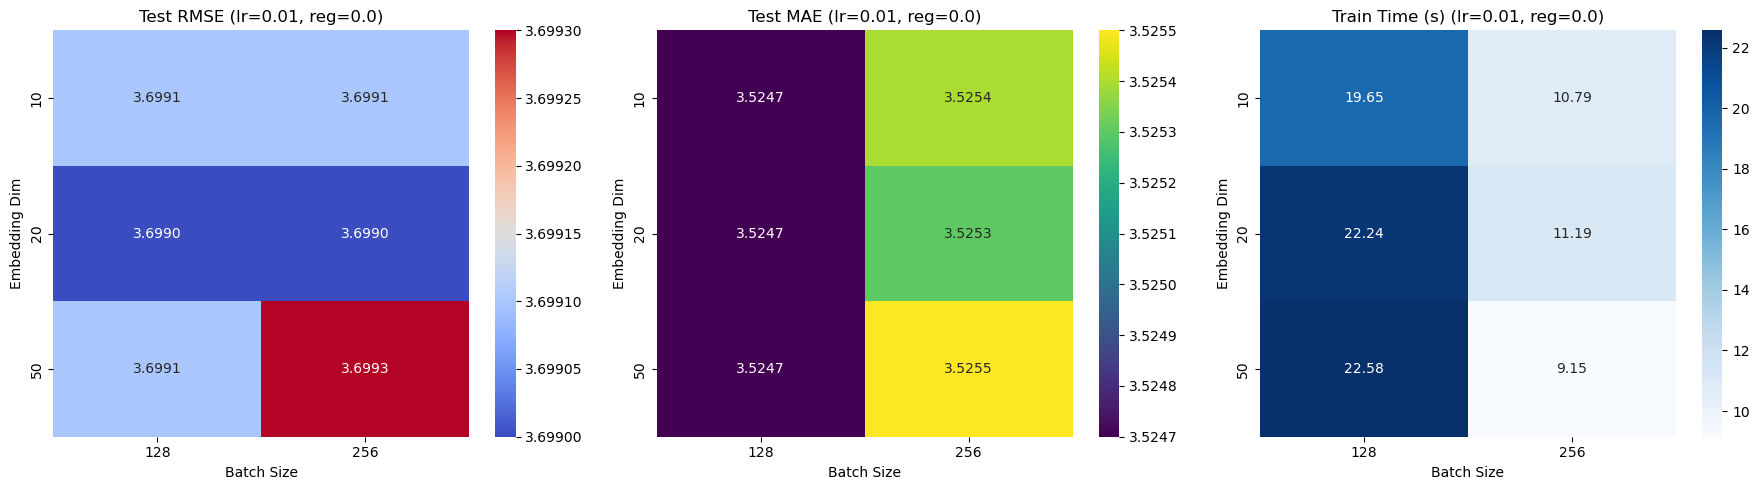

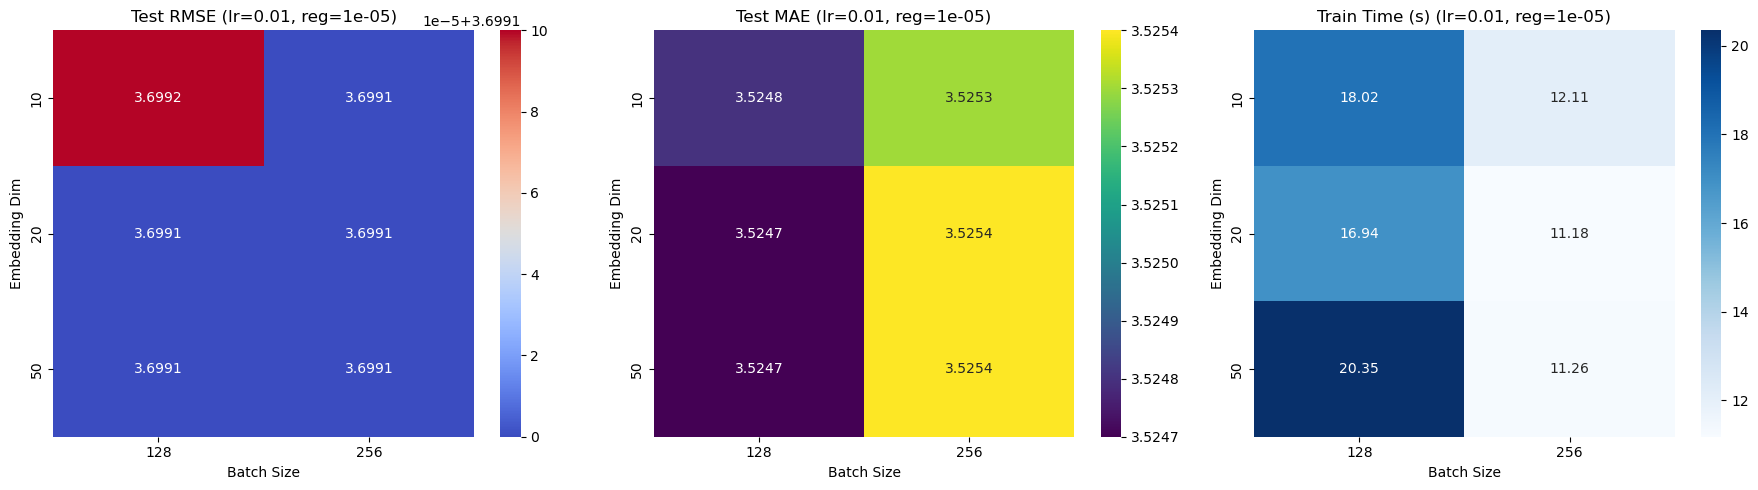

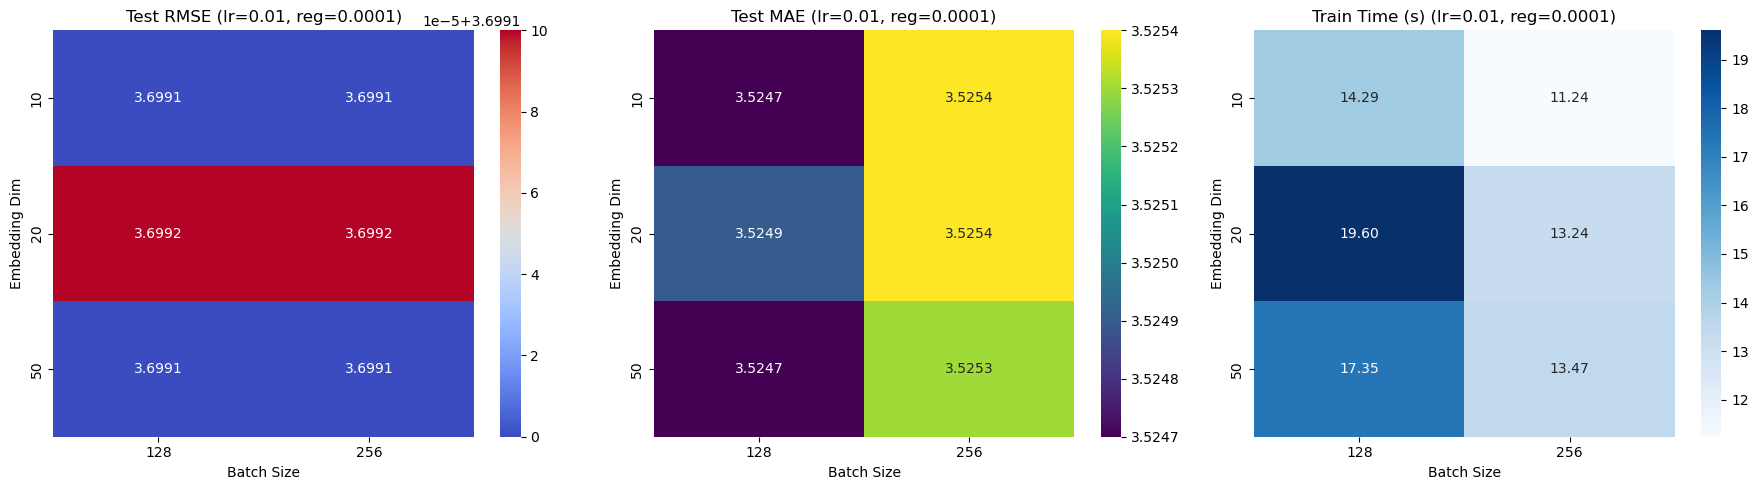

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les résultats depuis le fichier CSV
df = pd.read_csv('mf_hyperparameter_search_sgd_l2.csv')

# Choisir un learning rate pour filtrer la visualisation
for lr in df['Learning Rate'].unique():
    subset = df[df['Learning Rate'] == lr]

    for reg in sorted(subset['Reg Lambda'].unique()):
        reg_subset = subset[subset['Reg Lambda'] == reg]

        pivot_rmse = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Test RMSE')
        pivot_mae = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Test MAE')
        pivot_time = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Train Time (s)')

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        sns.heatmap(pivot_rmse, annot=True, fmt=".4f", ax=axes[0], cmap='coolwarm')
        axes[0].set_title(f'Test RMSE (lr={lr}, reg={reg})')

        sns.heatmap(pivot_mae, annot=True, fmt=".4f", ax=axes[1], cmap='viridis')
        axes[1].set_title(f'Test MAE (lr={lr}, reg={reg})')

        sns.heatmap(pivot_time, annot=True, fmt=".2f", ax=axes[2], cmap='Blues')
        axes[2].set_title(f'Train Time (s) (lr={lr}, reg={reg})')

        plt.tight_layout()
        plt.show()


In [109]:
# FTRL

In [110]:


import time
import itertools
import pandas as pd
import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Hyperparamètres à tester
embedding_dims = [10, 20, 50]
learning_rates = [0.001, 0.01]
batch_sizes = [128, 256]
reg_lambdas = [0.0, 1e-5, 1e-4]  # ← Régularisation L2

# Résultats
results_hp = []

# Définir modèle MF avec régularisation
class MFModel(tf.keras.Model):
    def __init__(self, n_users, n_items, emb_dim=20, reg_lambda=0.0):
        super().__init__()
        self.user_emb = tf.keras.layers.Embedding(
            n_users, emb_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )
        self.item_emb = tf.keras.layers.Embedding(
            n_items, emb_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )

    def call(self, inputs):
        u, i = inputs
        u_vec = self.user_emb(u)
        i_vec = self.item_emb(i)
        return tf.reduce_sum(u_vec * i_vec, axis=1)

# Boucle sur toutes les combinaisons
for emb_dim, lr, batch_size, reg_lambda in itertools.product(
    embedding_dims, learning_rates, batch_sizes, reg_lambdas):

    print(f"\n=== Training FTRL: emb_dim={emb_dim}, lr={lr}, bs={batch_size}, reg_lambda={reg_lambda} ===")

    train_ds = df_to_dataset(train_df, user_mapper, movie_mapper, batch_size=batch_size)
    test_ds  = df_to_dataset(test_df,  user_mapper, movie_mapper, batch_size=batch_size, shuffle=False)

    model = MFModel(n_users, n_items, emb_dim=emb_dim, reg_lambda=reg_lambda)
    optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=[
            tf.keras.metrics.RootMeanSquaredError(name='rmse'),
            tf.keras.metrics.MeanAbsoluteError(name='mae')
        ]
    )

    t0 = time.time()
    model.fit(train_ds, epochs=5, verbose=0)
    train_time = time.time() - t0

    eval_res = model.evaluate(test_ds, verbose=0)
    test_rmse = eval_res[1]
    test_mae  = eval_res[2]

    results_hp.append({
        'Optimizer':      'FTRL',
        'Embedding Dim':  emb_dim,
        'Learning Rate':  lr,
        'Batch Size':     batch_size,
        'Reg Lambda':     reg_lambda,
        'Train Time (s)': round(train_time, 2),
        'Test RMSE':      round(test_rmse, 4),
        'Test MAE':       round(test_mae, 4)
    })

# Résumé
df_hp = pd.DataFrame(results_hp)
print(df_hp)
df_hp.to_csv('mf_hyperparameter_search_ftrl_l2.csv', index=False)



=== Training FTRL: emb_dim=10, lr=0.001, bs=128, reg_lambda=0.0 ===

=== Training FTRL: emb_dim=10, lr=0.001, bs=128, reg_lambda=1e-05 ===

=== Training FTRL: emb_dim=10, lr=0.001, bs=128, reg_lambda=0.0001 ===

=== Training FTRL: emb_dim=10, lr=0.001, bs=256, reg_lambda=0.0 ===

=== Training FTRL: emb_dim=10, lr=0.001, bs=256, reg_lambda=1e-05 ===

=== Training FTRL: emb_dim=10, lr=0.001, bs=256, reg_lambda=0.0001 ===

=== Training FTRL: emb_dim=10, lr=0.01, bs=128, reg_lambda=0.0 ===

=== Training FTRL: emb_dim=10, lr=0.01, bs=128, reg_lambda=1e-05 ===

=== Training FTRL: emb_dim=10, lr=0.01, bs=128, reg_lambda=0.0001 ===

=== Training FTRL: emb_dim=10, lr=0.01, bs=256, reg_lambda=0.0 ===

=== Training FTRL: emb_dim=10, lr=0.01, bs=256, reg_lambda=1e-05 ===

=== Training FTRL: emb_dim=10, lr=0.01, bs=256, reg_lambda=0.0001 ===

=== Training FTRL: emb_dim=20, lr=0.001, bs=128, reg_lambda=0.0 ===

=== Training FTRL: emb_dim=20, lr=0.001, bs=128, reg_lambda=1e-05 ===

=== Training FTRL

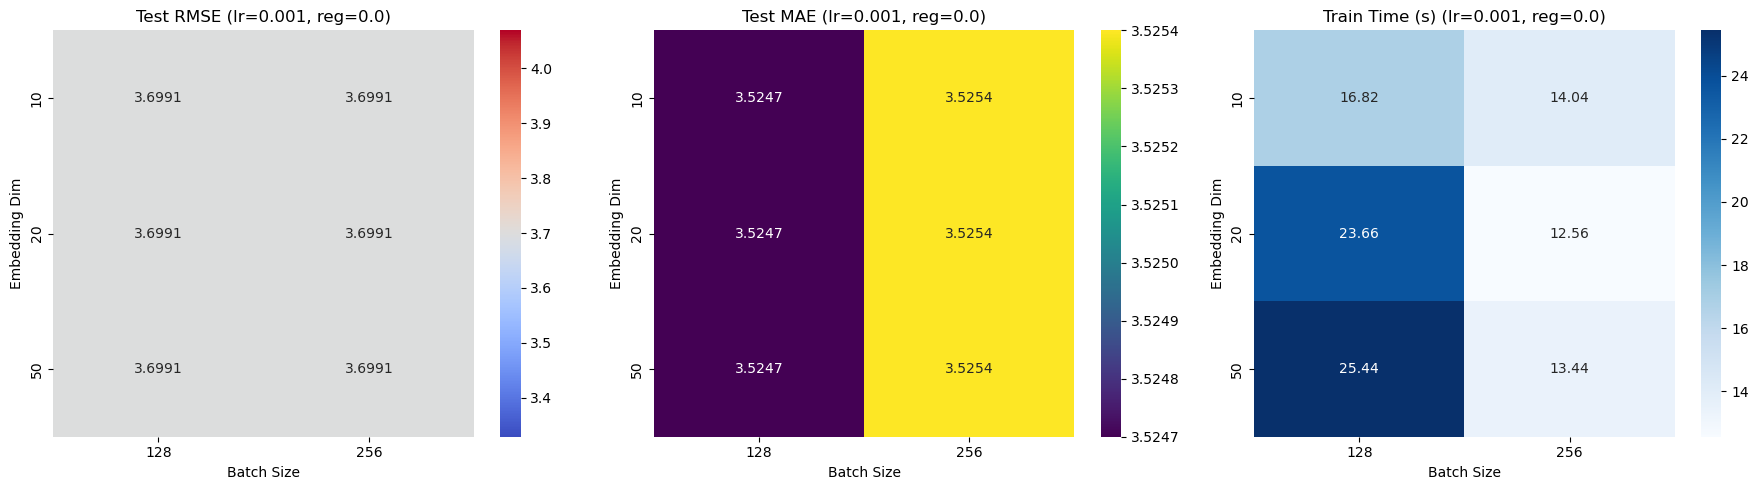

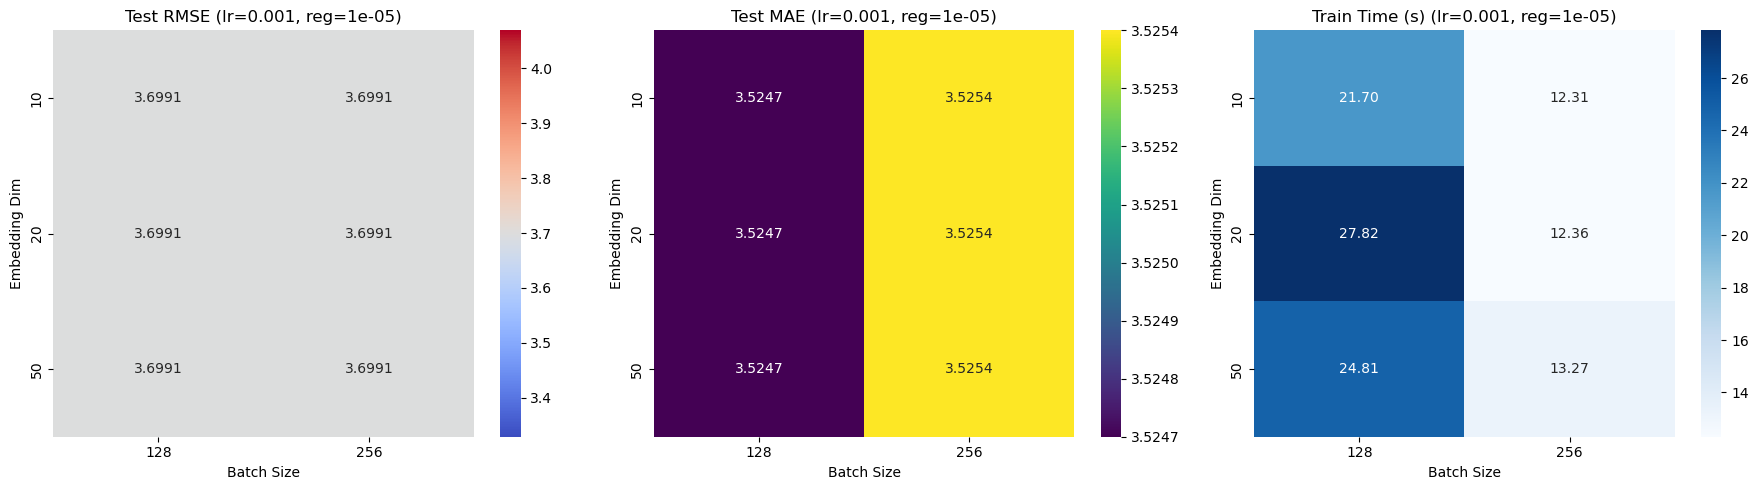

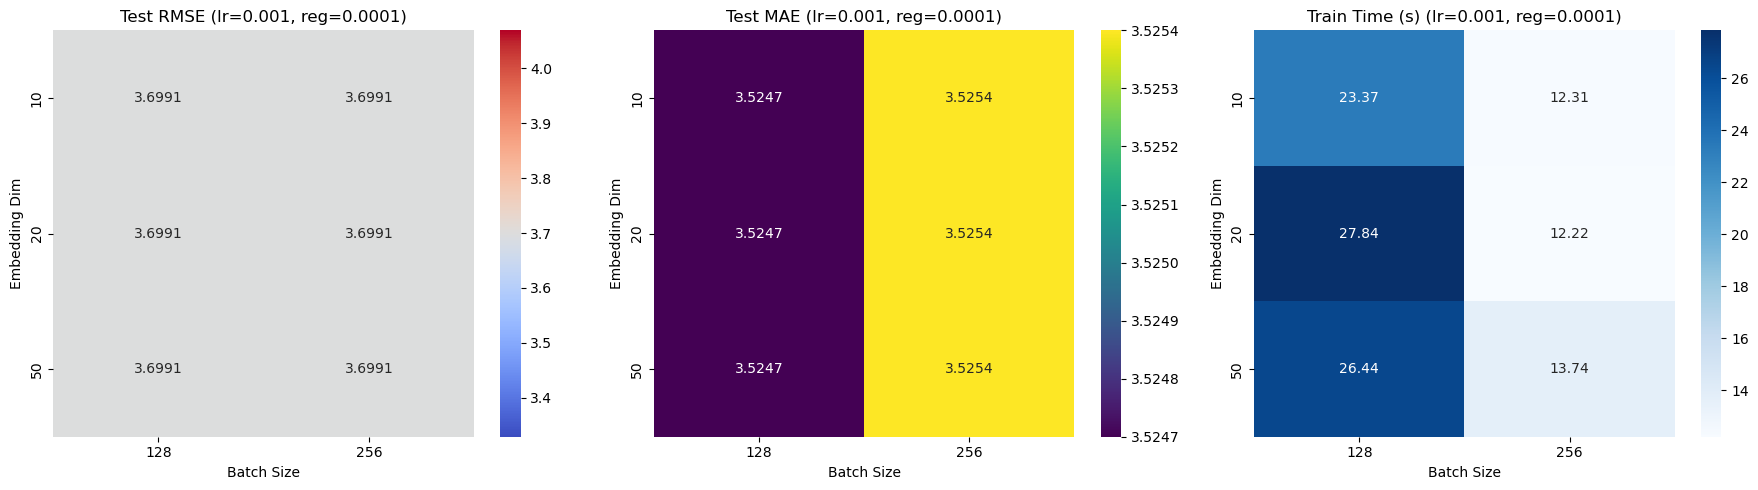

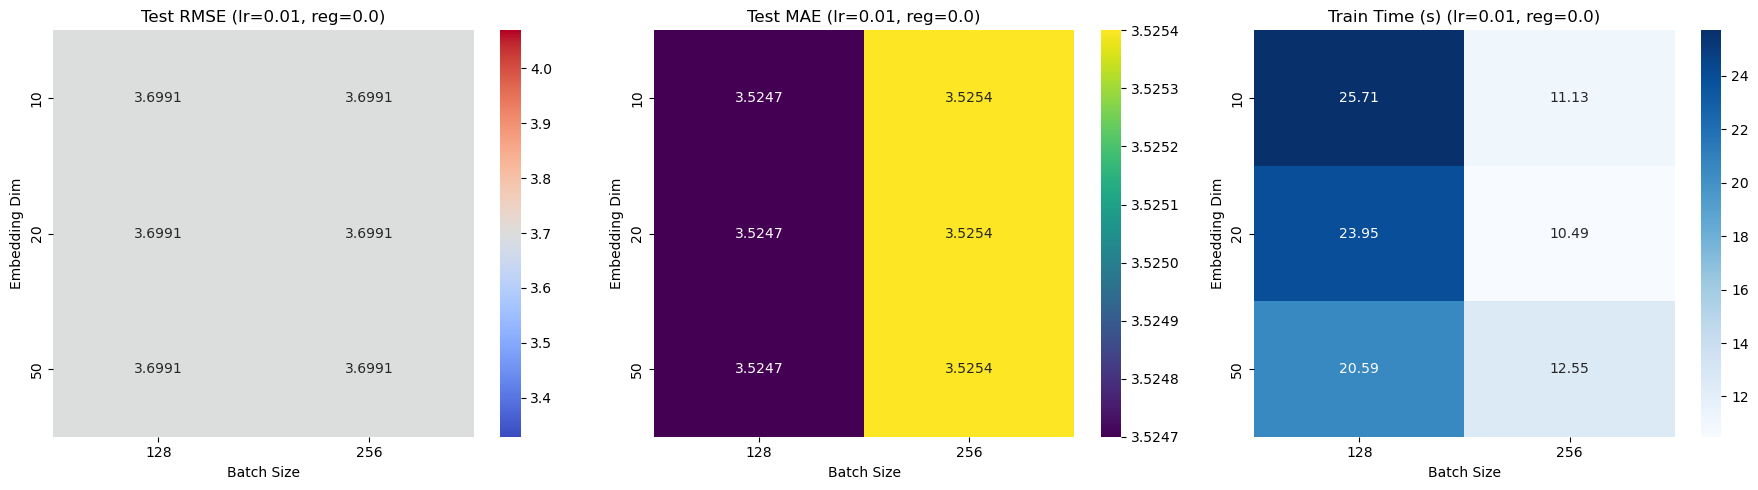

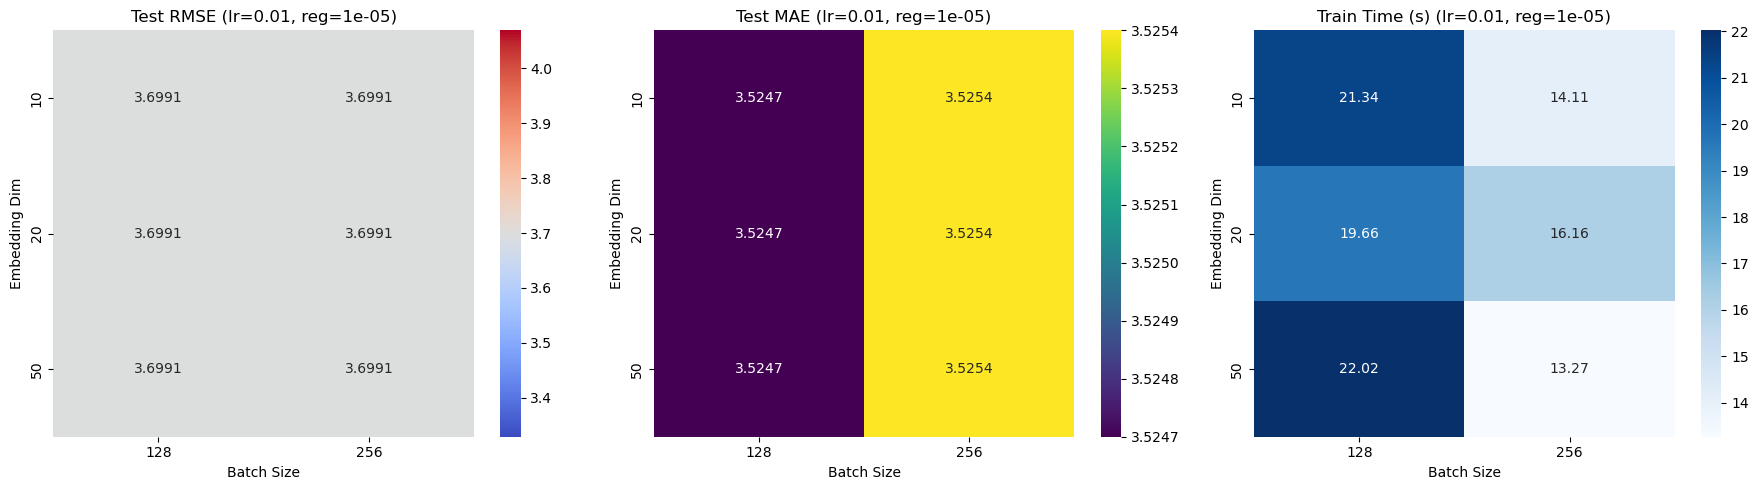

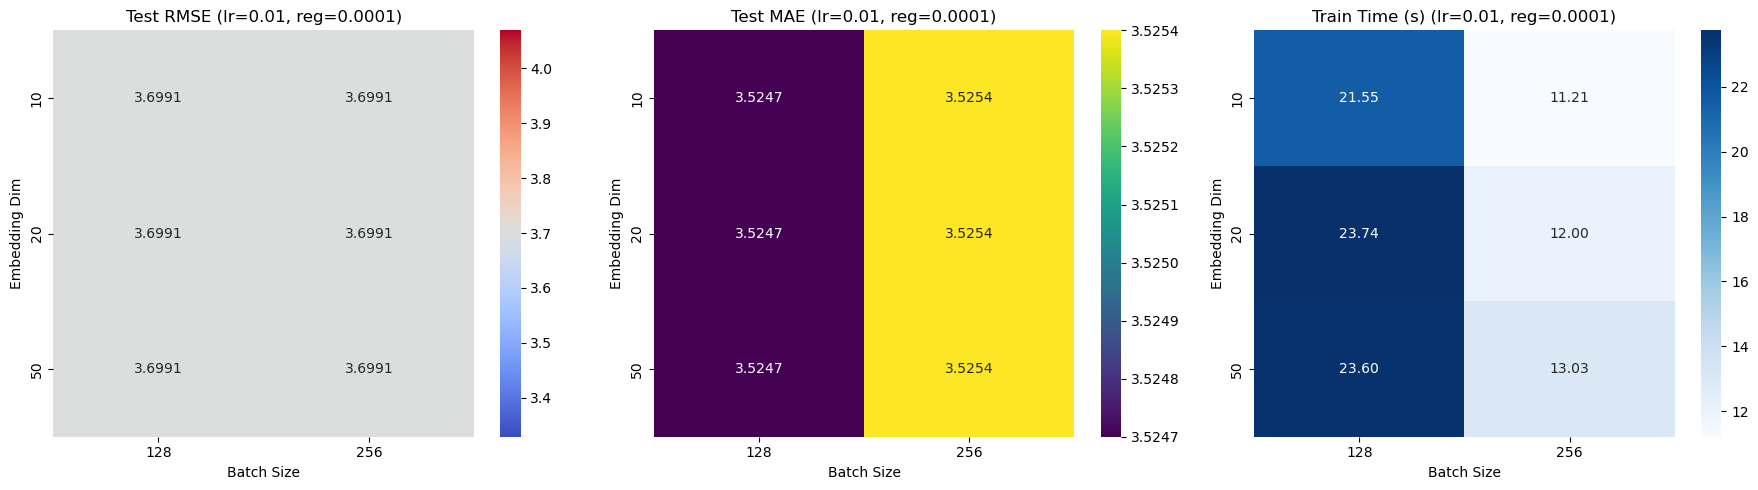

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les résultats depuis le fichier CSV
df = pd.read_csv('mf_hyperparameter_search_ftrl_l2.csv')

# Choisir un learning rate pour filtrer la visualisation
for lr in df['Learning Rate'].unique():
    subset = df[df['Learning Rate'] == lr]

    for reg in sorted(subset['Reg Lambda'].unique()):
        reg_subset = subset[subset['Reg Lambda'] == reg]

        pivot_rmse = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Test RMSE')
        pivot_mae = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Test MAE')
        pivot_time = reg_subset.pivot(index='Embedding Dim', columns='Batch Size', values='Train Time (s)')

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        sns.heatmap(pivot_rmse, annot=True, fmt=".4f", ax=axes[0], cmap='coolwarm')
        axes[0].set_title(f'Test RMSE (lr={lr}, reg={reg})')

        sns.heatmap(pivot_mae, annot=True, fmt=".4f", ax=axes[1], cmap='viridis')
        axes[1].set_title(f'Test MAE (lr={lr}, reg={reg})')

        sns.heatmap(pivot_time, annot=True, fmt=".2f", ax=axes[2], cmap='Blues')
        axes[2].set_title(f'Train Time (s) (lr={lr}, reg={reg})')

        plt.tight_layout()
        plt.show()


In [112]:
# Implémentation finale — MFModel avec entraînement

In [113]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 1) Split train/test
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# 2) Build tf.data Datasets
# Mélange les données si shuffle=True (important pour entraîner un modèle robuste)	
# Regroupe les données en "lots" (batches) pour accélérer l’entraînement
def df_to_dataset(df, user_map, movie_map, batch_size=256, shuffle=True):
    users   = df['userId'].map(user_map).values
    movies  = df['movieId'].map(movie_map).values
    ratings = df['rating'].values.astype('float32')
    ds = tf.data.Dataset.from_tensor_slices(((users, movies), ratings))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    return ds.batch(batch_size)
# train_ds : jeu de données mélangé et découpé en batches (pour l’entraînement)
# test_ds : même chose mais non mélangé (utile pour l’évaluation)
train_ds = df_to_dataset(train_df, user_mapper, movie_mapper)
test_ds  = df_to_dataset(test_df,  user_mapper, movie_mapper, shuffle=False)

In [118]:

import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Meilleurs hyperparamètres
embedding_dim = 50
learning_rate = 0.001
batch_size = 128
reg_lambda = 0.0
n_epochs = 20

# Définir le modèle avec régularisation L2 (même si reg_lambda = 0.0 ici)
class MFModel(tf.keras.Model):
    def __init__(self, n_users, n_movies, embedding_dim, reg_lambda=0.0):
        super(MFModel, self).__init__()
        self.user_embedding = tf.keras.layers.Embedding(
            n_users, embedding_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )
        self.movie_embedding = tf.keras.layers.Embedding(
            n_movies, embedding_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )

    def call(self, inputs):
        user_input, movie_input = inputs
        user_vec  = self.user_embedding(user_input)
        movie_vec = self.movie_embedding(movie_input)
        dot       = tf.reduce_sum(user_vec * movie_vec, axis=1)
        return dot

# Création du modèle
n_users = len(user_mapper)
n_movies = len(movie_mapper)
model = MFModel(n_users=n_users, n_movies=n_movies, embedding_dim=embedding_dim, reg_lambda=reg_lambda)

# Compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'), 'mae']
)

# Reconstruction des datasets avec le bon batch_size
train_ds = df_to_dataset(train_df, user_mapper, movie_mapper, batch_size=batch_size)
test_ds  = df_to_dataset(test_df,  user_mapper, movie_mapper, batch_size=batch_size, shuffle=False)

# Entraînement du modèle
history = model.fit(train_ds, validation_data=test_ds, epochs=n_epochs)



Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 13.5308 - mae: 3.5002 - rmse: 3.6782 - val_loss: 7.4098 - val_mae: 2.4903 - val_rmse: 2.7221
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.2377 - mae: 1.7236 - rmse: 2.0368 - val_loss: 1.3045 - val_mae: 0.8952 - val_rmse: 1.1422
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.1551 - mae: 0.8406 - rmse: 1.0746 - val_loss: 1.0026 - val_mae: 0.7846 - val_rmse: 1.0013
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9342 - mae: 0.7596 - rmse: 0.9665 - val_loss: 0.9431 - val_mae: 0.7618 - val_rmse: 0.9712
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.8693 - mae: 0.7358 - rmse: 0.9324 - val_loss: 0.9167 - val_mae: 0.7527 - val_rmse: 0.9574
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.8473 - mae: 0.7262 - rmse: 0.9204 - val_loss: 0.9009 - val_mae: 0.7449 - val_rmse: 0.9492
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.8084 - mae: 0.7081 - rmse

In [119]:
model.evaluate(test_ds)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9145 - mae: 0.7466 - rmse: 0.9562


[0.921596109867096, 0.9599979519844055, 0.7502086758613586]

In [121]:

# 1. Choisir un utilisateur réel
user_id = 123  # Exemple d'ID réel présent dans tes données
u = user_mapper[user_id]  # Convertir en index interne

# 2. Liste de films à prédire
movie_ids = [10, 50, 100]  # ID réels présents dans movie_mapper
movie_indices = [movie_mapper[mid] for mid in movie_ids]

# 3. Prédire les notes
predictions = model.predict((
    tf.convert_to_tensor([u]*len(movie_ids)),
    tf.convert_to_tensor(movie_indices)
))
# # Afficher les titres et les prédictions
for mid, p in zip(movie_ids, predictions):
    title = item.loc[item['movieId'] == mid, 'title'].values[0]
    print(f"Film '{title}' : prédiction = {p:.1f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Film 'Richard III (1995)' : prédiction = 4.2
Film 'Star Wars (1977)' : prédiction = 3.7
Film 'Fargo (1996)' : prédiction = 4.5


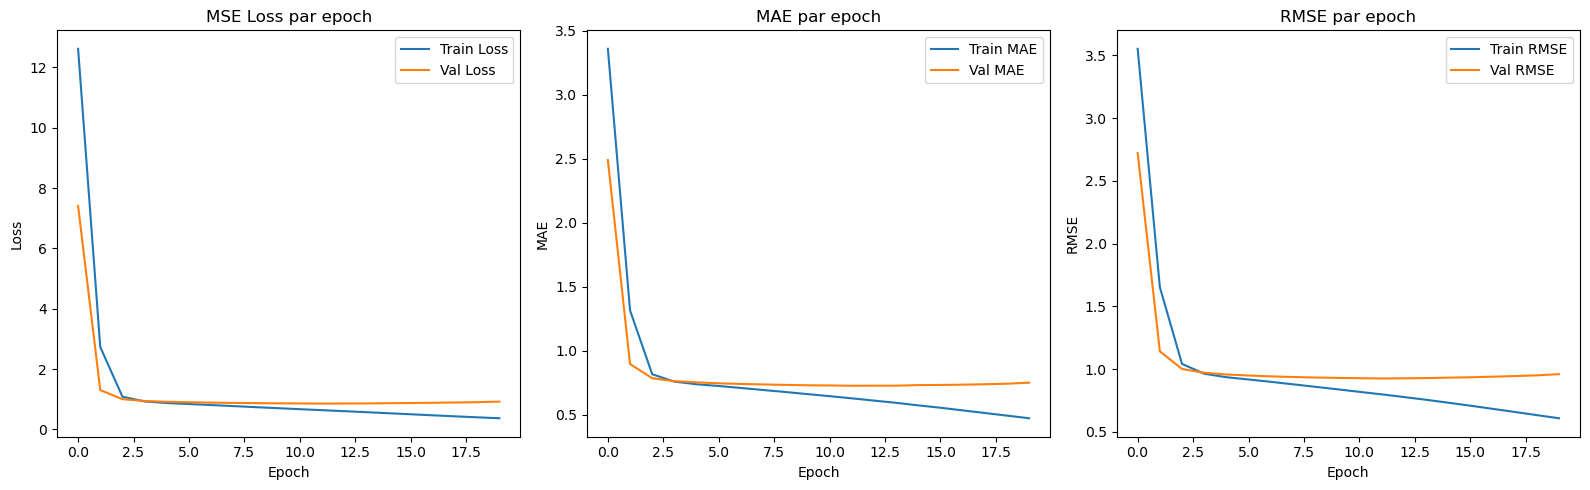

In [122]:
import matplotlib.pyplot as plt

metrics = history.history

plt.figure(figsize=(16, 5))

# 1. Loss
plt.subplot(1, 3, 1)
plt.plot(metrics['loss'], label='Train Loss')
plt.plot(metrics['val_loss'], label='Val Loss')
plt.title("MSE Loss par epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# 2. MAE
plt.subplot(1, 3, 2)
plt.plot(metrics['mae'], label='Train MAE')
plt.plot(metrics['val_mae'], label='Val MAE')
plt.title("MAE par epoch")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

# 3. RMSE (corrigé)
plt.subplot(1, 3, 3)
plt.plot(metrics['rmse'], label='Train RMSE')
plt.plot(metrics['val_rmse'], label='Val RMSE')
plt.title("RMSE par epoch")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()

plt.tight_layout()
plt.show()


In [162]:
from pathlib import Path
import pandas as pd

# Fichiers à lire
files = {
    "Adam": "mf_hyperparameter_search_with_regularization_adamfn.csv",
    "SGD": "mf_hyperparameter_search_sgd_l2.csv",
    "Adagrad": "mf_hyperparameter_search_adagradfn.csv",
    "FTRL": "mf_hyperparameter_search_ftrl_l2.csv"
}

best_results = []

# Lire chaque fichier et extraire la ligne avec le plus petit RMSE
for optimizer, file_name in files.items():
    df = pd.read_csv(file_name)  # ✅ lire le fichier ici
    df['Optimizer'] = optimizer
    best_row = df.loc[df['Test RMSE'].idxmin()]
    best_results.append(best_row)

# Créer un DataFrame récapitulatif
best_df = pd.DataFrame(best_results)

# Afficher le tableau
print(best_df)


# Ou avec un affichage plus joli si vous utilisez Jupyter
import IPython.display as display
display.display(best_df)
best_df.to_csv("best_hyperparameters_by_optimizer_mf.csv", index=False)


    Embedding Dim  Learning Rate  Batch Size  Reg Lambda  Train Time (s)  \
24             50          0.001         128      0.0000           22.41   
18             20          0.010         128      0.0000           22.24   
32             50          0.010         128      0.0001           19.78   
0              10          0.001         128      0.0000           16.82   

    Test RMSE  Test MAE Optimizer  
24     0.9495    0.7446      Adam  
18     3.6990    3.5247       SGD  
32     3.6984    3.5240   Adagrad  
0      3.6991    3.5247      FTRL  


,Embedding Dim,Learning Rate,Batch Size,Reg Lambda,Train Time (s),Test RMSE,Test MAE,Optimizer
24,50,0.001,128,0.0000,22.41,0.9495,0.7446,Adam
18,20,0.010,128,0.0000,22.24,3.6990,3.5247,SGD
32,50,0.010,128,0.0001,19.78,3.6984,3.5240,Adagrad
0,10,0.001,128,0.0000,16.82,3.6991,3.5247,FTRL


C:\Users\user\AppData\Local\Temp\ipykernel_13124\327896030.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Optimizer", y="Test RMSE", palette="Blues_d")
C:\Users\user\AppData\Local\Temp\ipykernel_13124\327896030.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Optimizer", y="Test MAE", palette="Greens_d")


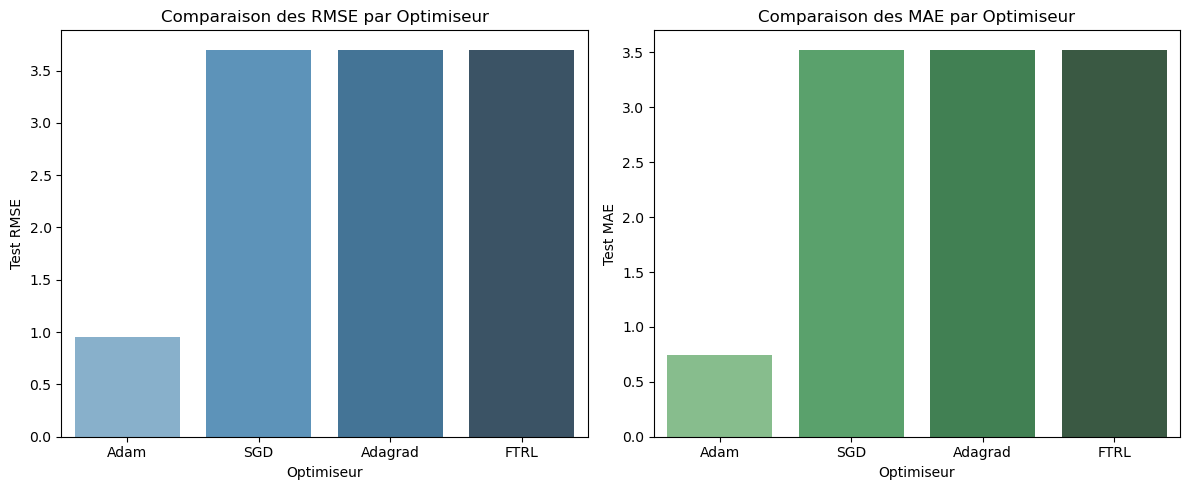

C:\Users\user\AppData\Local\Temp\ipykernel_13124\327896030.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Optimizer", y="Train Time (s)", palette="Reds")


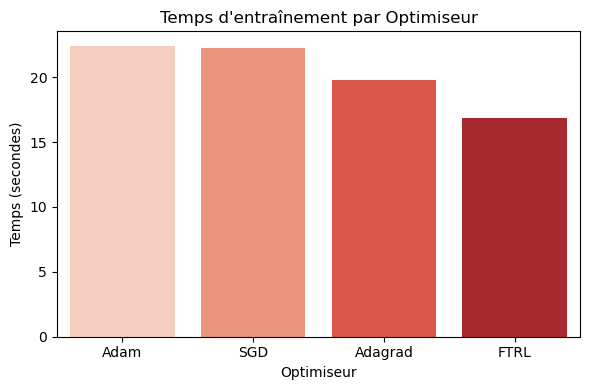

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("best_hyperparameters_by_optimizer.csv")


# ───── 1. Barplot pour RMSE et MAE ─────
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x="Optimizer", y="Test RMSE", palette="Blues_d")
plt.title("Comparaison des RMSE par Optimiseur")
plt.ylabel("Test RMSE")
plt.xlabel("Optimiseur")

plt.subplot(1, 2, 2)
sns.barplot(data=df, x="Optimizer", y="Test MAE", palette="Greens_d")
plt.title("Comparaison des MAE par Optimiseur")
plt.ylabel("Test MAE")
plt.xlabel("Optimiseur")

plt.tight_layout()
plt.show()

# ───── 2. Graphe du temps d'entraînement ─────
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Optimizer", y="Train Time (s)", palette="Reds")
plt.title("Temps d'entraînement par Optimiseur")
plt.ylabel("Temps (secondes)")
plt.xlabel("Optimiseur")
plt.tight_layout()
plt.show()


In [ ]:
#NCF avec L2

In [123]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Input, Concatenate, Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l2

class NCFModelL2(Model):
    def __init__(self, n_users, n_items, embedding_dim=50, reg_lambda=1e-4):
        super().__init__()

        self.user_embedding = Embedding(
            input_dim=n_users,
            output_dim=embedding_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )
        self.item_embedding = Embedding(
            input_dim=n_items,
            output_dim=embedding_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )

        self.concat = Concatenate()
        self.fc1 = Dense(128, activation='relu', kernel_regularizer=l2(reg_lambda))
        self.dropout1 = Dropout(0.2)
        self.fc2 = Dense(64, activation='relu', kernel_regularizer=l2(reg_lambda))
        self.dropout2 = Dropout(0.2)
        self.output_layer = Dense(1, kernel_regularizer=l2(reg_lambda))  # sortie

    def call(self, inputs):
        user_input, item_input = inputs
        user_vec = self.user_embedding(user_input)
        item_vec = self.item_embedding(item_input)

        x = self.concat([user_vec, item_vec])
        x = Flatten()(x)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        return tf.squeeze(self.output_layer(x), axis=1)


In [124]:
model = NCFModelL2(n_users=len(user_mapper), n_items=len(movie_mapper), embedding_dim=50, reg_lambda=1e-4)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"), tf.keras.metrics.MeanAbsoluteError(name="mae")]
)

history = model.fit(train_ds, validation_data=test_ds, epochs=20)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3.1920 - mae: 1.3132 - rmse: 1.6778 - val_loss: 0.9461 - val_mae: 0.7570 - val_rmse: 0.9538
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.9248 - mae: 0.7464 - rmse: 0.9426 - val_loss: 0.9409 - val_mae: 0.7450 - val_rmse: 0.9512
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.8923 - mae: 0.7308 - rmse: 0.9250 - val_loss: 0.9160 - val_mae: 0.7407 - val_rmse: 0.9370
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.8490 - mae: 0.7094 - rmse: 0.9000 - val_loss: 0.9254 - val_mae: 0.7558 - val_rmse: 0.9406
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.8224 - mae: 0.6954 - rmse: 0.8834 - val_loss: 0.9094 - val_mae: 0.7253 - val_rmse: 0.9299
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.7899 - mae: 0.6784 - rmse: 0.8624 - val_loss: 0.9153 - val_mae: 0.7270 - val_rmse: 0.9307
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.7564 - mae: 0.6597 - rms

In [125]:
model.evaluate(test_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1796 - mae: 0.8098 - rmse: 1.0442


[1.1749144792556763, 1.0420303344726562, 0.8087592720985413]

In [ ]:
# recherche d’hyperparamètres pour NCF avec L2

In [ ]:
# import time
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from sklearn.model_selection import train_test_split

# # 1) Split train/test
# train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
# n_users = len(user_mapper)
# n_items = len(movie_mapper)
# # 2) Build tf.data Datasets
# # Mélange les données si shuffle=True (important pour entraîner un modèle robuste)	
# # Regroupe les données en "lots" (batches) pour accélérer l’entraînement
# def df_to_dataset(df, user_map, movie_map, batch_size=256, shuffle=True):
#     users   = df['userId'].map(user_map).values
#     movies  = df['movieId'].map(movie_map).values
#     ratings = df['rating'].values.astype('float32')
#     ds = tf.data.Dataset.from_tensor_slices(((users, movies), ratings))
#     if shuffle:
#         ds = ds.shuffle(buffer_size=len(df))
#     return ds.batch(batch_size)
# # train_ds : jeu de données mélangé et découpé en batches (pour l’entraînement)
# # test_ds : même chose mais non mélangé (utile pour l’évaluation)
# train_ds = df_to_dataset(train_df, user_mapper, movie_mapper)
# test_ds  = df_to_dataset(test_df,  user_mapper, movie_mapper, shuffle=False)

In [ ]:
import itertools
import time
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, regularizers

# # Paramètres simulés (à remplacer par vos valeurs réelles)
# num_users = 1000
# num_items = 1500

# # Fonctions simulées (remplacez-les par vos vraies données et mappers)
# def df_to_dataset(df, user_mapper, item_mapper, batch_size=128, shuffle=True):
#     users = tf.random.uniform((len(df),), minval=0, maxval=num_users, dtype=tf.int32)
#     items = tf.random.uniform((len(df),), minval=0, maxval=num_items, dtype=tf.int32)
#     ratings = tf.random.uniform((len(df),), minval=1.0, maxval=5.0)
#     ds = tf.data.Dataset.from_tensor_slices(((users, items), ratings))
#     if shuffle:
#         ds = ds.shuffle(buffer_size=1024)
#     return ds.batch(batch_size)

# train_df = pd.DataFrame({"dummy": range(1000)})
# test_df = pd.DataFrame({"dummy": range(300)})
# user_mapper = {}
# item_mapper = {}

# train_ds = df_to_dataset(train_df, user_mapper, item_mapper)
# test_ds = df_to_dataset(test_df, user_mapper, item_mapper, shuffle=False)

# Définition du modèle NCF avec régularisation L2
class NCFModel(tf.keras.Model):
    def __init__(self, n_users, n_items, embedding_dim=20, reg_lambda=0.0):
        super().__init__()
        self.user_embedding = layers.Embedding(
            n_users, embedding_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(reg_lambda)
        )
        self.item_embedding = layers.Embedding(
            n_items, embedding_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(reg_lambda)
        )
        self.concat = layers.Concatenate()
        self.fc1 = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_lambda))
        self.dropout1 = layers.Dropout(0.2)
        self.fc2 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(reg_lambda))
        self.dropout2 = layers.Dropout(0.2)
        self.output_layer = layers.Dense(1, kernel_regularizer=regularizers.l2(reg_lambda))

    def call(self, inputs):
        user_input, item_input = inputs
        user_vec = self.user_embedding(user_input)
        item_vec = self.item_embedding(item_input)
        x = self.concat([user_vec, item_vec])
        x = tf.keras.layers.Flatten()(x)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        return tf.squeeze(self.output_layer(x), axis=1)

# Grille d'hyperparamètres
# embedding_dims = [20, 50]
# learning_rates = [0.001, 0.01]
# batch_sizes = [128,256]
# reg_lambdas = [1e-5, 1e-4]
# Hyperparamètres à tester
embedding_dims = [10, 20, 50]
learning_rates = [0.001, 0.01]
batch_sizes = [128, 256]
reg_lambdas = [0.0, 1e-5, 1e-4] 
optimizers = {
    'SGD': tf.keras.optimizers.SGD,
    'Adagrad': tf.keras.optimizers.Adagrad,
    'Adam': tf.keras.optimizers.Adam,
    'FTRL': tf.keras.optimizers.Ftrl
}

# Grid search
results = []

for opt_name, opt_class in optimizers.items():
    for emb_dim, lr, batch_size, reg_lambda in itertools.product(
        embedding_dims, learning_rates, batch_sizes, reg_lambdas):

        model = NCFModel(n_users, n_items, embedding_dim=emb_dim, reg_lambda=reg_lambda)
        model.compile(
            optimizer=opt_class(learning_rate=lr),
            loss='mse',
            metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'), tf.keras.metrics.MeanAbsoluteError(name='mae')]
        )
        t0 = time.time()
        model.fit(train_ds, epochs=5, verbose=0)
        train_time = time.time() - t0
        eval_res = model.evaluate(test_ds, verbose=0)

        results.append({
            'Optimizer': opt_name,
            'Embedding Dim': emb_dim,
            'Learning Rate': lr,
            'Batch Size': batch_size,
            'Reg Lambda': reg_lambda,
            'Train Time (s)': round(train_time, 2),
            'Test RMSE': round(eval_res[1], 4),
            'Test MAE': round(eval_res[2], 4)
        })

df_results = pd.DataFrame(results)
# Affichage simple
print(df_results)

# Ou, si tu es dans un notebook Jupyter :
import IPython.display as disp
disp.display(df_results)

# Sauvegarde en CSV
df_results.to_csv("ncf_hyperparameter_results.csv", index=False)


In [ ]:
# implementation finale de NCF

In [130]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

class NCFModel(tf.keras.Model):
    def __init__(self, n_users, n_items, embedding_dim=50, reg_lambda=1e-4):
        super().__init__()
        self.user_embedding = tf.keras.layers.Embedding(
            input_dim=n_users,
            output_dim=embedding_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )
        self.item_embedding = tf.keras.layers.Embedding(
            input_dim=n_items,
            output_dim=embedding_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(reg_lambda)
        )
        self.concat = tf.keras.layers.Concatenate()
        self.fc1 = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(reg_lambda))
        self.dropout1 = tf.keras.layers.Dropout(0.2)
        self.fc2 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(reg_lambda))
        self.dropout2 = tf.keras.layers.Dropout(0.2)
        self.output_layer = tf.keras.layers.Dense(1, kernel_regularizer=l2(reg_lambda))

    def call(self, inputs):
        user_input, item_input = inputs
        user_vec = self.user_embedding(user_input)
        item_vec = self.item_embedding(item_input)
        x = self.concat([user_vec, item_vec])
        x = tf.keras.layers.Flatten()(x)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        return tf.squeeze(self.output_layer(x), axis=1)

# Hyperparamètres finaux
embedding_dim = 50
learning_rate = 0.01
batch_size = 256
reg_lambda = 1e-4

# Préparation des datasets
train_ds = df_to_dataset(train_df, user_mapper, movie_mapper, batch_size=batch_size)
test_ds = df_to_dataset(test_df, user_mapper, movie_mapper, batch_size=batch_size, shuffle=False)

# Instanciation et compilation du modèle
model = NCFModel(n_users, n_items, embedding_dim=embedding_dim, reg_lambda=reg_lambda)
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
    loss='mse',
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='rmse'),
        tf.keras.metrics.MeanAbsoluteError(name='mae')
    ]
)

# Entraînement final
history = model.fit(train_ds, validation_data=test_ds, epochs=20)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3.4176 - mae: 1.4235 - rmse: 1.7517 - val_loss: 1.1416 - val_mae: 0.8595 - val_rmse: 1.0494
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1017 - mae: 0.8372 - rmse: 1.0301 - val_loss: 1.0155 - val_mae: 0.7860 - val_rmse: 0.9874
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.9858 - mae: 0.7757 - rmse: 0.9722 - val_loss: 0.9691 - val_mae: 0.7621 - val_rmse: 0.9636
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.9487 - mae: 0.7563 - rmse: 0.9529 - val_loss: 0.9480 - val_mae: 0.7524 - val_rmse: 0.9525
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9262 - mae: 0.7473 - rmse: 0.9410 - val_loss: 0.9371 - val_mae: 0.7458 - val_rmse: 0.9468
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9045 - mae: 0.7352 - rmse: 0.9295 - val_loss: 0.9311 - val_mae: 0.7459 - val_rmse: 0.9437
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.8891 - mae: 0.7292 - rmse

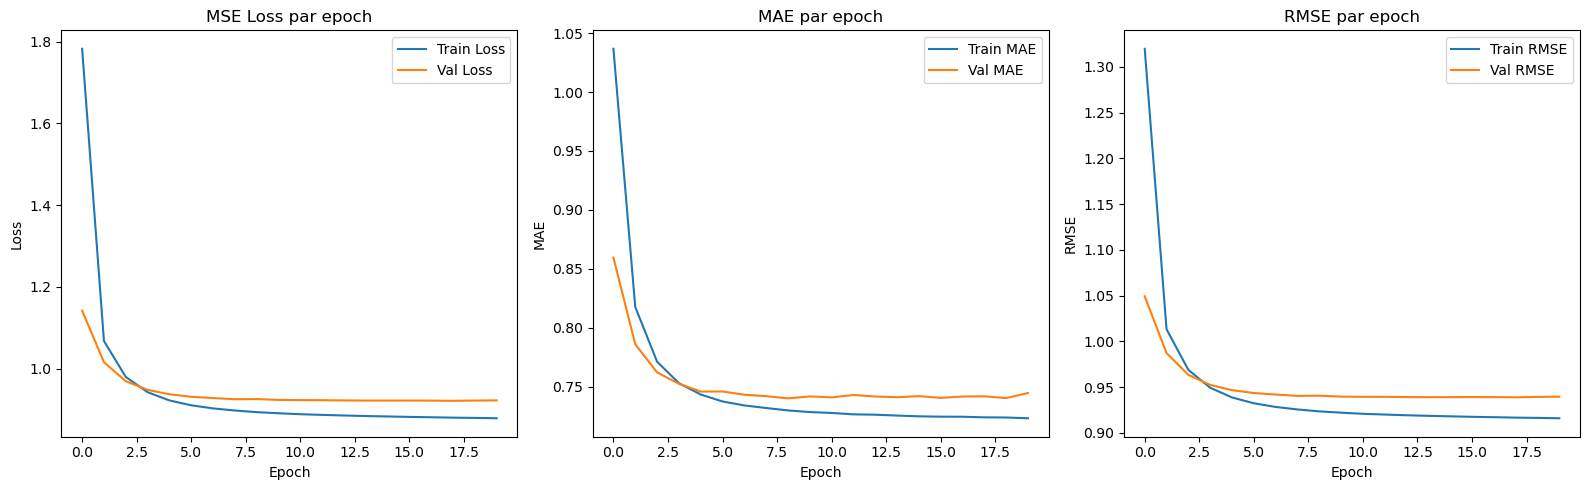

In [131]:
import matplotlib.pyplot as plt

metrics = history.history

plt.figure(figsize=(16, 5))

# 1. Loss
plt.subplot(1, 3, 1)
plt.plot(metrics['loss'], label='Train Loss')
plt.plot(metrics['val_loss'], label='Val Loss')
plt.title("MSE Loss par epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# 2. MAE
plt.subplot(1, 3, 2)
plt.plot(metrics['mae'], label='Train MAE')
plt.plot(metrics['val_mae'], label='Val MAE')
plt.title("MAE par epoch")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

# 3. RMSE (corrigé)
plt.subplot(1, 3, 3)
plt.plot(metrics['rmse'], label='Train RMSE')
plt.plot(metrics['val_rmse'], label='Val RMSE')
plt.title("RMSE par epoch")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()

plt.tight_layout()
plt.show()


In [173]:
import pandas as pd

# Lire le fichier une fois qu’il est généré
df = pd.read_csv("ncf_hyperparameter_results.csv")

# Trouver la meilleure config (RMSE minimale) pour chaque optimiseur
best_rows = df.loc[df.groupby("Optimizer")["Test RMSE"].idxmin()].reset_index(drop=True)

import IPython.display as display
display.display(best_rows)
best_rows.to_csv("best_hyperparameters_by_optimizer_ncf1.csv", index=False)

,Optimizer,Embedding Dim,Learning Rate,Batch Size,Reg Lambda,Train Time (s),Test RMSE,Test MAE
0,Adagrad,20,0.01,128,0.00010,25.09,0.9390,0.7404
1,Adam,10,0.01,128,0.00001,26.21,0.9290,0.7309
2,FTRL,50,0.01,128,0.00010,24.65,0.9594,0.7583
3,SGD,50,0.01,256,0.00010,26.14,0.9619,0.7596


C:\Users\user\AppData\Local\Temp\ipykernel_13124\1568916903.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Optimizer", y="Test RMSE", palette="Blues_d")
C:\Users\user\AppData\Local\Temp\ipykernel_13124\1568916903.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Optimizer", y="Test MAE", palette="Greens_d")


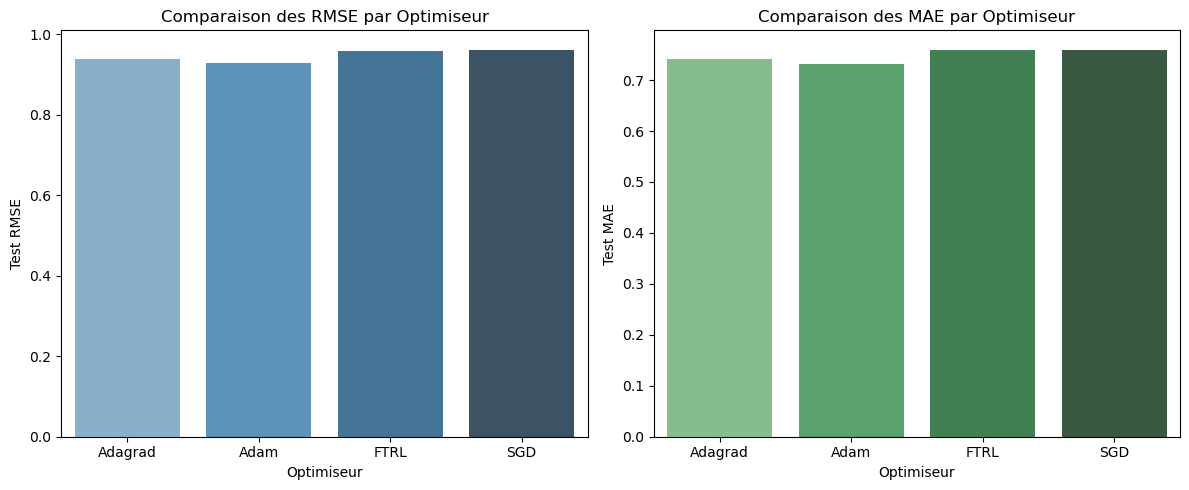

C:\Users\user\AppData\Local\Temp\ipykernel_13124\1568916903.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Optimizer", y="Train Time (s)", palette="Reds")


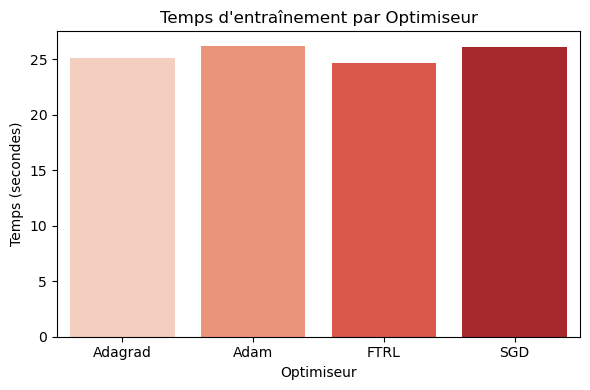

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("best_hyperparameters_by_optimizer_ncf1.csv")


# ───── 1. Barplot pour RMSE et MAE ─────
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x="Optimizer", y="Test RMSE", palette="Blues_d")
plt.title("Comparaison des RMSE par Optimiseur")
plt.ylabel("Test RMSE")
plt.xlabel("Optimiseur")

plt.subplot(1, 2, 2)
sns.barplot(data=df, x="Optimizer", y="Test MAE", palette="Greens_d")
plt.title("Comparaison des MAE par Optimiseur")
plt.ylabel("Test MAE")
plt.xlabel("Optimiseur")

plt.tight_layout()
plt.show()

# ───── 2. Graphe du temps d'entraînement ─────
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Optimizer", y="Train Time (s)", palette="Reds")
plt.title("Temps d'entraînement par Optimiseur")
plt.ylabel("Temps (secondes)")
plt.xlabel("Optimiseur")
plt.tight_layout()
plt.show()


In [175]:
# Évaluation finale
test_loss, test_rmse, test_mae = model.evaluate(test_ds, verbose=1)

print(f"\n📊 Résultats finaux sur le jeu de test :")
print(f"➡️ Test RMSE : {test_rmse:.4f}")
print(f"➡️ Test MAE  : {test_mae:.4f}")
print(f"➡️ Test MSE  : {test_loss:.4f}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9105 - mae: 0.7396 - rmse: 0.9333

📊 Résultats finaux sur le jeu de test :
➡️ Test RMSE : 0.9397
➡️ Test MAE  : 0.7446
➡️ Test MSE  : 0.9222


In [176]:
import pandas as pd

# 1) Charger les CSV
mf_df  = pd.read_csv("best_hyperparameters_by_optimizer_mf.csv")
ncf_df = pd.read_csv("best_hyperparameters_by_optimizer_ncf1.csv")

# 2) Identifier la ligne de RMSE minimale pour chaque DataFrame
best_mf  = mf_df.loc[mf_df['Test RMSE'].idxmin()].to_frame().T
best_ncf = ncf_df.loc[ncf_df['Test RMSE'].idxmin()].to_frame().T

# 3) Ajouter la colonne “Model”
best_mf['Model']  = 'MF'
best_ncf['Model'] = 'NCF'

# 4) Concaténer et réordonner
combined = pd.concat([best_mf, best_ncf], ignore_index=True)
cols = ['Model', 'Optimizer', 'Embedding Dim', 'Learning Rate',
        'Batch Size', 'Reg Lambda', 'Train Time (s)', 'Test RMSE', 'Test MAE']
combined = combined[cols]

# 5) Affichage
print("=== Meilleurs hyperparamètres MF vs NCF (par RMSE minimal) ===\n")
print(combined.to_string(index=False))


=== Meilleurs hyperparamètres MF vs NCF (par RMSE minimal) ===

Model Optimizer Embedding Dim Learning Rate Batch Size Reg Lambda Train Time (s) Test RMSE Test MAE
   MF      Adam            50         0.001        128        0.0          22.41    0.9495   0.7446
  NCF      Adam            10          0.01        128    0.00001          26.21     0.929   0.7309


In [178]:
from IPython.display import display
display(combined)

,Model,Optimizer,Embedding Dim,Learning Rate,Batch Size,Reg Lambda,Train Time (s),Test RMSE,Test MAE
0,MF,Adam,50,0.001,128,0.0,22.41,0.9495,0.7446
1,NCF,Adam,10,0.01,128,0.00001,26.21,0.929,0.7309


In [ ]:
# Le modèle NCF avec l’optimiseur Adam et une dimension d’embedding de 10 offre la meilleure performance globale sur le dataset MovieLens 100k,
# en termes de précision (RMSE et MAE), tout en restant raisonnable en temps d'entraînement